In [1]:
import numpy as np
import pandas as pd
import sys
import sqlite3

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('plotting.mplstyle')

In [2]:
import glob
import os
from scipy import stats

In [7]:
df = pd.read_csv('/../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/greedy/fresh/dg1_fresh_fuel.csv')

In [8]:
df

,Year,UOx,Total UOx,AP UOx,Total AP UOx,Xe100h,Total Xe100h,Xe100l,Total Xe100l,MMRh,Total MMRh,MMRl,Total MMRl
0,1958.00,0.0,0.000000e+00,0.000000,0.000000e+00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.0
1,1958.08,0.0,0.000000e+00,0.000000,0.000000e+00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.0
2,1958.17,0.0,0.000000e+00,0.000000,0.000000e+00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.0
3,1958.25,0.0,0.000000e+00,0.000000,0.000000e+00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.0
4,1958.33,0.0,0.000000e+00,0.000000,0.000000e+00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2103.58,0.0,1.973343e+08,307717.842324,1.086159e+08,23735.40,12754007.76,0.0,0.0,0.0,1953446.298,0.0,0.0
1748,2103.67,0.0,1.973343e+08,239336.099585,1.088552e+08,18429.84,12772437.60,0.0,0.0,0.0,1953446.298,0.0,0.0
1749,2103.75,0.0,1.973343e+08,239336.099585,1.090945e+08,25690.08,12798127.68,0.0,0.0,0.0,1953446.298,0.0,0.0
1750,2103.83,0.0,1.973343e+08,239336.099585,1.093339e+08,19267.56,12817395.24,0.0,0.0,0.0,1953446.298,0.0,0.0


In [17]:
df.loc[852, 'Year']

2029.0

In [25]:
df['Total MMRl']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1747    0.0
1748    0.0
1749    0.0
1750    0.0
1751    0.0
Name: Total MMRl, Length: 1752, dtype: float64

In [6]:
def calculate_statistics(folder_path, start_index=852):
    # Get all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    # Calculate statistics
    statistics = {}

    # Read each CSV file and append to the DataFrame
    for file in csv_files:
        df = pd.read_csv(file)

        for column in df.columns:
            statistics[f'{file}_{column}'] = {
                'average': df[column][start_index:].mean(),
                'max': df[column][start_index:].max(),
                'min': df[column][start_index:].min(),
                'std': df[column][start_index:].std()
                }
    return statistics

In [15]:
add = '/../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/greed/fresh/'

In [16]:
values_df = calculate_statistics(add)

In [17]:
values_df

{'/../../../../../../../media/nsryan/Elements/scenes/analysis/multi_fuel/rand_greed/fresh/drgng_fresh_fuel.csv_Year': {'average': 2066.4583333333335,
  'max': 2103.92,
  'min': 2029.0,
  'std': 21.66266433613732},
 '/../../../../../../../media/nsryan/Elements/scenes/analysis/multi_fuel/rand_greed/fresh/drgng_fresh_fuel.csv_UOx': {'average': 73662.33287229136,
  'max': 410290.4564315353,
  'min': 0.0,
  'std': 100138.4032388258},
 '/../../../../../../../media/nsryan/Elements/scenes/analysis/multi_fuel/rand_greed/fresh/drgng_fresh_fuel.csv_Total UOx': {'average': 181985623.60534653,
  'max': 197334323.65145075,
  'min': 131106605.80912814,
  'std': 19846296.958687864},
 '/../../../../../../../media/nsryan/Elements/scenes/analysis/multi_fuel/rand_greed/fresh/drgng_fresh_fuel.csv_AP UOx': {'average': 154960.62701705852,
  'max': 1084278.0082987552,
  'min': 0.0,
  'std': 140588.96164725567},
 '/../../../../../../../media/nsryan/Elements/scenes/analysis/multi_fuel/rand_greed/fresh/drgng_fre

In [48]:
rows = ['ng', '5', '15', '1', '2']
average_results_df = pd.DataFrame(index=rows)
max_results_df = pd.DataFrame(index=rows)
min_results_df = pd.DataFrame(index=rows)
stan_dev_results_df = pd.DataFrame(index=rows)

In [62]:
average_results_df

""
ng
5
15
1
2


In [80]:
refs = []
for key, value in values_df.items():
    ref = key.split(add)[-1]
    refs.append(ref)

print(refs)

['dg2_fresh_fuel.csv_Year', 'dg2_fresh_fuel.csv_UOx', 'dg2_fresh_fuel.csv_Total UOx', 'dg2_fresh_fuel.csv_AP UOx', 'dg2_fresh_fuel.csv_Total AP UOx', 'dg2_fresh_fuel.csv_Xe100h', 'dg2_fresh_fuel.csv_Total Xe100h', 'dg2_fresh_fuel.csv_Xe100l', 'dg2_fresh_fuel.csv_Total Xe100l', 'dg2_fresh_fuel.csv_MMRh', 'dg2_fresh_fuel.csv_Total MMRh', 'dg2_fresh_fuel.csv_MMRl', 'dg2_fresh_fuel.csv_Total MMRl', 'dg15_fresh_fuel.csv_Year', 'dg15_fresh_fuel.csv_UOx', 'dg15_fresh_fuel.csv_Total UOx', 'dg15_fresh_fuel.csv_AP UOx', 'dg15_fresh_fuel.csv_Total AP UOx', 'dg15_fresh_fuel.csv_Xe100h', 'dg15_fresh_fuel.csv_Total Xe100h', 'dg15_fresh_fuel.csv_Xe100l', 'dg15_fresh_fuel.csv_Total Xe100l', 'dg15_fresh_fuel.csv_MMRh', 'dg15_fresh_fuel.csv_Total MMRh', 'dg15_fresh_fuel.csv_MMRl', 'dg15_fresh_fuel.csv_Total MMRl', 'dg5_fresh_fuel.csv_Year', 'dg5_fresh_fuel.csv_UOx', 'dg5_fresh_fuel.csv_Total UOx', 'dg5_fresh_fuel.csv_AP UOx', 'dg5_fresh_fuel.csv_Total AP UOx', 'dg5_fresh_fuel.csv_Xe100h', 'dg5_fresh_fue

In [81]:
metric = 'fresh'
for key, value in values_df.items():
    ref = key.split(add)[-1]
    name = ref.split('_')[-1]
    if 'ng' in ref:
        print('ng found in', ref)
        average_results_df.loc['ng', f'{name}_{metric}'] = value['average']
        max_results_df.loc['ng', f'{name}_{metric}'] = value['max']
        min_results_df.loc['ng', f'{name}_{metric}'] = value['min']
        stan_dev_results_df.loc['ng', f'{name}_{metric}'] = value['std']

        print('removing', ref)
        refs.remove(ref)
    elif '15' in ref:
        print('15 found in', ref)
        average_results_df.loc['15', f'{name}_{metric}'] = value['average']
        max_results_df.loc['15', f'{name}_{metric}'] = value['max']
        min_results_df.loc['15', f'{name}_{metric}'] = value['min']
        stan_dev_results_df.loc['15', f'{name}_{metric}'] = value['std']

        print('removing', ref)
        refs.remove(ref)
    elif '5' in ref:
        print('5 found in', ref)
        average_results_df.loc['5', f'{name}_{metric}'] = value['average']
        max_results_df.loc['5', f'{name}_{metric}'] = value['max']
        min_results_df.loc['5', f'{name}_{metric}'] = value['min']
        stan_dev_results_df.loc['5', f'{name}_{metric}'] = value['std']

        print('removing', ref)
        refs.remove(ref)
    elif '2' in ref:
        print('2 found in', ref)
        average_results_df.loc['2', f'{name}_{metric}'] = value['average']
        max_results_df.loc['2', f'{name}_{metric}'] = value['max']
        min_results_df.loc['2', f'{name}_{metric}'] = value['min']
        stan_dev_results_df.loc['2', f'{name}_{metric}'] = value['std']

        print('removing', ref)
        refs.remove(ref)
    elif '1' in ref:
        print('1 found in', ref)
        average_results_df.loc['1', f'{name}_{metric}'] = value['average']
        max_results_df.loc['1', f'{name}_{metric}'] = value['max']
        min_results_df.loc['1', f'{name}_{metric}'] = value['min']
        stan_dev_results_df.loc['1', f'{name}_{metric}'] = value['std']

        print('removing', ref)
        refs.remove(ref)
print(refs)

2 found in dg2_fresh_fuel.csv_Year
removing dg2_fresh_fuel.csv_Year
2 found in dg2_fresh_fuel.csv_UOx
removing dg2_fresh_fuel.csv_UOx
2 found in dg2_fresh_fuel.csv_Total UOx
removing dg2_fresh_fuel.csv_Total UOx
2 found in dg2_fresh_fuel.csv_AP UOx
removing dg2_fresh_fuel.csv_AP UOx
2 found in dg2_fresh_fuel.csv_Total AP UOx
removing dg2_fresh_fuel.csv_Total AP UOx
2 found in dg2_fresh_fuel.csv_Xe100h
removing dg2_fresh_fuel.csv_Xe100h
2 found in dg2_fresh_fuel.csv_Total Xe100h
removing dg2_fresh_fuel.csv_Total Xe100h
2 found in dg2_fresh_fuel.csv_Xe100l
removing dg2_fresh_fuel.csv_Xe100l
2 found in dg2_fresh_fuel.csv_Total Xe100l
removing dg2_fresh_fuel.csv_Total Xe100l
2 found in dg2_fresh_fuel.csv_MMRh
removing dg2_fresh_fuel.csv_MMRh
2 found in dg2_fresh_fuel.csv_Total MMRh
removing dg2_fresh_fuel.csv_Total MMRh
2 found in dg2_fresh_fuel.csv_MMRl
removing dg2_fresh_fuel.csv_MMRl
2 found in dg2_fresh_fuel.csv_Total MMRl
removing dg2_fresh_fuel.csv_Total MMRl
15 found in dg15_fresh_f

In [82]:
stan_dev_results_df

,Year_fresh,UOx_fresh,Total UOx_fresh,AP UOx_fresh,Total AP UOx_fresh,Xe100h_fresh,Total Xe100h_fresh,Xe100l_fresh,Total Xe100l_fresh,MMRh_fresh,Total MMRh_fresh,MMRl_fresh,Total MMRl_fresh
ng,21.662664,100138.403239,1.984630e+07,131475.707631,3.421516e+07,8050.616176,3.848793e+06,0.0,0.0,8747.048085,570252.112386,0.0,0.0
5,21.662664,100138.403239,1.984630e+07,98269.728791,2.337735e+07,4552.619492,1.677821e+06,0.0,0.0,6395.131414,371440.388335,0.0,0.0
15,21.662664,100138.403239,1.984630e+07,105714.584140,2.678756e+07,7174.498541,2.523503e+06,0.0,0.0,9018.092264,581739.265999,0.0,0.0
1,21.662664,100138.403239,1.984630e+07,131475.707631,3.421516e+07,8050.616176,3.848793e+06,0.0,0.0,8747.048085,570252.112386,0.0,0.0
2,21.662664,100138.403239,1.984630e+07,707638.216129,1.703063e+08,8401.917563,2.873397e+06,0.0,0.0,8791.433526,591464.449611,0.0,0.0


In [4]:
def calculate_statistics(folder_path, start_index=852):
    # Get all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    # Calculate statistics
    statistics = {}

    # Read each CSV file and append to the DataFrame
    for file in csv_files:
        df = pd.read_csv(file)
        print('the file is',file)

        for column in df.columns:
            print('the column is',column)
            df[column] = pd.to_numeric(df[column], errors='coerce')
            statistics[f'{file}_{column}'] = {
                'average': df[column][start_index:].mean(),
                'max': df[column][start_index:].max(),
                'min': df[column][start_index:].min(),
                'stand': df[column][start_index:].std()
                }
    return statistics



databases = {
    'one_fuel':{
        'rand_greed_one': ['drg1', 'drg2', 'drg5', 'drg15', 'drgng'],
        'random': ['dr1', 'dr2', 'dr5', 'dr15', 'drng'],
        'greedy': ['dg1', 'dg2', 'dg5', 'dg15', 'dgng']
        },
    'multi_fuel':{
        'greedy': ['dg1', 'dg2', 'dg5', 'dg15', 'dgng'],
        'rand_greed': ['drg1', 'drg2', 'drg5', 'drg15', 'drgng'],
        'random': ['dr1', 'dr2', 'dr5', 'dr15', 'drng']
        },
}

In [5]:
base_folder = '../../../../../../../media/nsryan/Elements/scenes/analysis/'

metric = 'fresh'

rows = ['ng', '5', '15', '1', '2']
average_results_df = pd.DataFrame(index=rows)
max_results_df = pd.DataFrame(index=rows)
min_results_df = pd.DataFrame(index=rows)
stan_dev_results_df = pd.DataFrame(index=rows)

# for fuel in databases.keys():
#     for direc in databases[fuel].keys():
#         average_results_df[fuel+'_'+direc] = 0
#         max_results_df[fuel+'_'+direc] = 0
#         min_results_df[fuel+'_'+direc] = 0
#         stan_dev_results_df[fuel+'_'+direc] = 0

for fuel in databases.keys():
    for direc in databases[fuel].keys():
        dfold = f'{fuel}/{direc}/{metric}/'
        start_index = 852
        values_df = calculate_statistics(base_folder + dfold, start_index)

        for key, value in values_df.items():
            ref = key.split(base_folder + dfold)[-1]
            name = ref.split('_')[-1]
            if 'ng' in ref:
                average_results_df.loc['ng', f'{name}_{metric}'] = value['average']
                max_results_df.loc['ng', f'{name}_{metric}'] = value['max']
                min_results_df.loc['ng', f'{name}_{metric}'] = value['min']
                stan_dev_results_df.loc['ng', f'{name}_{metric}'] = value['stand']

            elif '15' in ref:
                average_results_df.loc['15', f'{name}_{metric}'] = value['average']
                max_results_df.loc['15', f'{name}_{metric}'] = value['max']
                min_results_df.loc['15', f'{name}_{metric}'] = value['min']
                stan_dev_results_df.loc['15', f'{name}_{metric}'] = value['stand']

            elif '5' in ref:
                average_results_df.loc['5', f'{name}_{metric}'] = value['average']
                max_results_df.loc['5', f'{name}_{metric}'] = value['max']
                min_results_df.loc['5', f'{name}_{metric}'] = value['min']
                stan_dev_results_df.loc['5', f'{name}_{metric}'] = value['stand']


            elif '2' in ref:
                average_results_df.loc['2', f'{name}_{metric}'] = value['average']
                max_results_df.loc['2', f'{name}_{metric}'] = value['max']
                min_results_df.loc['2', f'{name}_{metric}'] = value['min']
                stan_dev_results_df.loc['2', f'{name}_{metric}'] = value['stand']


            elif '1' in ref:
                average_results_df.loc['1', f'{name}_{metric}'] = value['average']
                max_results_df.loc['1', f'{name}_{metric}'] = value['max']
                min_results_df.loc['1', f'{name}_{metric}'] = value['min']
                stan_dev_results_df.loc['1', f'{name}_{metric}'] = value['stand']


    # save the results to a csv
    average_results_df.to_csv(base_folder + f'{direc}_{metric}_avg_total_calcs' + '.csv')
    max_results_df.to_csv(base_folder + f'{direc}_{metric}_max_total_calcs' + '.csv')
    min_results_df.to_csv(base_folder + f'{direc}_{metric}_min_total_calcs' + '.csv')
    stan_dev_results_df.to_csv(base_folder + f'{direc}_{metric}_stan_dev_total_calcs' + '.csv')

the file is ../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/rand_greed_one/fresh/drgng_fresh_fuel.csv
the column is Year
the column is UOx
the column is Total UOx
the column is AP UOx
the column is Total AP UOx
the column is Xe100h
the column is Total Xe100h
the column is Xe100l
the column is Total Xe100l
the column is MMRh
the column is Total MMRh
the column is MMRl
the column is Total MMRl
the file is ../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/rand_greed_one/fresh/drg15_fresh_fuel.csv
the column is Year
the column is UOx
the column is Total UOx
the column is AP UOx
the column is Total AP UOx
the column is Xe100h
the column is Total Xe100h
the column is Xe100l
the column is Total Xe100l
the column is MMRh
the column is Total MMRh
the column is MMRl
the column is Total MMRl
the file is ../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/rand_greed_one/fresh/drg5_fresh_fuel.csv
the column is Year
the column is UOx
the column i

In [6]:
df['Total MMRl']

NameError: name 'df' is not defined

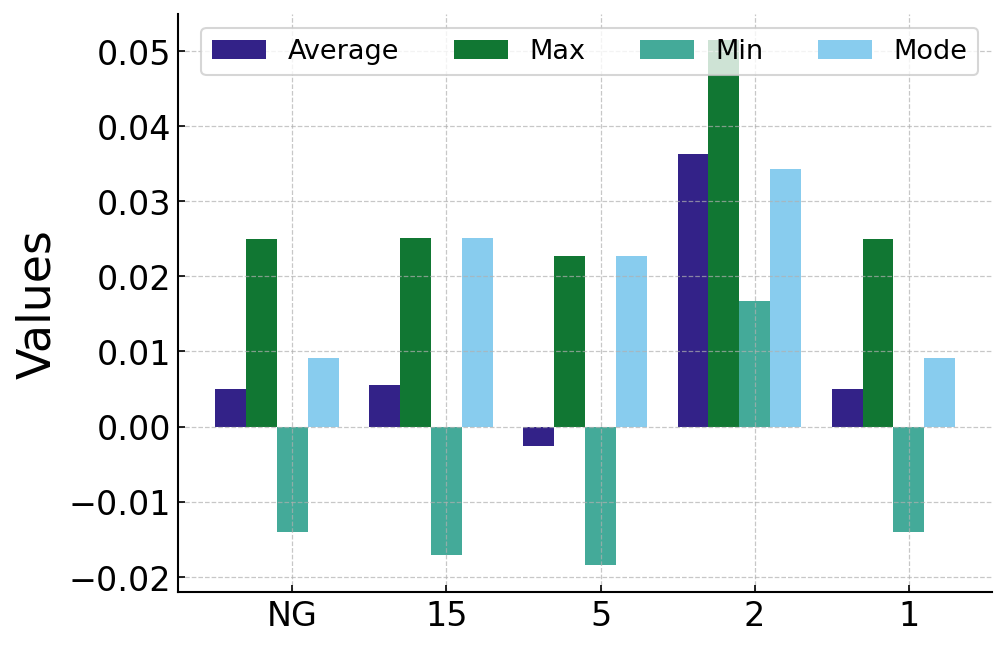

In [21]:
data = {
    'one_fuel': {
        'rand_greed_one':
            {'drgng_energy': [0.009168039182274455, 0.025012816268247938, -0.014012611941747495, -0.00021368790461895353],
            'drg15_energy': [0.004194077091931919, 0.025154234635531205, -0.01704151185280999, 0.009626093326260743],
            'drg5_energy': [0.0015417317905090063, 0.022665757521217553, -0.01848951169188456, -0.01590811302818307],
            'drg2_energy': [0.03433536037659846, 0.0513919086311893, 0.016652506240526842, 0.04250016383095412],
            'drg1_energy': [0.009168039182274455, 0.025012816268247938, -0.014012611941747495, -0.00021368790461895353]},
        'random':
            {'dr2_energy': [0.03436686766223714, 0.05178006444491839, 0.01678039080102745, 0.038251042756834386],
            'dr15_energy': [0.004007489688522858, 0.025405232302307217, -0.01733248370177948, 0.018886901414078228],
            'dr5_energy': [0.0009109331987498335, 0.02063261544074169, -0.025484916330261016, -0.0007959588689582223],
            'dr1_energy': [0.009046377234101378, 0.0248212029863277, -0.015727989378898934, 0.017480087058581895],
            'drng_energy': [0.009046377234101378, 0.0248212029863277, -0.015727989378898934, 0.017480087058581895]},
        'greedy':
            {'dg3_energy': [0.05543058971423251, 0.06448110784031026, 0.039754478777887174, 0.05473000614192414],
            'dg2_energy': [0.03430380133356598, 0.043977892309882305, 0.019270501577685752, 0.043977892309882305],
            'dg15_energy': [0.00486845774891446, 0.017013231255277848, -0.01306867540133053, 0.012271210840567648],
            'dg5_energy': [0.0012044477527524103, 0.016282162542709335, -0.01724055590047257, 0.00141305703340594],
            'dgng_energy': [0.0100294486673043, 0.022344595802359, -0.00635349996272671, 0.015846426738160502],
            'dg1_energy': [0.0100294486673043, 0.022344595802359, -0.00635349996272671, 0.015846426738160502]}},
    'multi_fuel': {
        'greedy':
            {'dgng_energy': [0.0100294486673043, 0.022344595802359, -0.00635349996272671, 0.015846426738160502],
            'dg15_energy': [0.00486845774891446, 0.017013231255277848, -0.01306867540133053, 0.012271210840567648],
            'dg5_energy': [0.0012044477527524103, 0.016282162542709335, -0.01724055590047257, 0.00141305703340594],
            'dg2_energy': [0.03430380133356598, 0.043977892309882305, 0.019270501577685752, 0.043977892309882305],
            'dg1_energy': [0.0100294486673043, 0.022344595802359, -0.00635349996272671, 0.015846426738160502]},
        'rand_greed':
            {'drgng_energy': [0.009168039182274455, 0.025012816268247938, -0.014012611941747495, -0.00021368790461895353],
            'drg15_energy': [0.004194077091931919, 0.025154234635531205, -0.01704151185280999, 0.009626093326260743],
            'drg5_energy': [0.0015417317905090063, 0.022665757521217553, -0.01848951169188456, -0.01590811302818307],
            'drg2_energy': [0.03433536037659846, 0.0513919086311893, 0.016652506240526842, 0.04250016383095412],
            'drg1_energy': [0.009168039182274455, 0.025012816268247938, -0.014012611941747495, -0.00021368790461895353]},
        'random':
            {'drng_energy': [0.009046377234101378, 0.0248212029863277, -0.015727989378898934, 0.017480087058581895],
            'dr15_energy': [0.004007489688522858, 0.025405232302307217, -0.01733248370177948, 0.018886901414078228],
            'dr5_energy': [0.0009109331987498335, 0.02063261544074169, -0.025484916330261016, -0.0007959588689582223],
            'dr2_energy': [0.03436686766223714, 0.05178006444491839, 0.01678039080102745, 0.038251042756834386],
            'dr1_energy': [0.009046377234101378, 0.0248212029863277, -0.015727989378898934, 0.017480087058581895]}
        }
    }

fuel = 'one_fuel'
scheme = 'rand_greed_one'

# Extract the average, max, min, and mode values from the data
average_values = [np.mean(values) for values in data['one_fuel']['rand_greed_one'].values()]
max_values = [np.max(values) for values in data['one_fuel']['rand_greed_one'].values()]
min_values = [np.min(values) for values in data['one_fuel']['rand_greed_one'].values()]
mode_values = [max(set(values), key=values.count) for values in data['one_fuel']['rand_greed_one'].values()]

# Plot the values
fig, ax = plt.subplots()
x = np.arange(len(average_values))
width = 0.2

rects1 = ax.bar(x - width, average_values, width, label='Average')
rects2 = ax.bar(x, max_values, width, label='Max')
rects3 = ax.bar(x + width, min_values, width, label='Min')
rects4 = ax.bar(x + 2*width, mode_values, width, label='Mode')

ax.set_ylabel('Values')
ax.set_xticks(x + width, ('NG', '15', '5', '2', '1'))
# ax.set_xticklabels(data['one_fuel']['rand_greed_one'].keys())
ax.legend(ncols=4)

plt.show()

In [72]:
# open a csv into a pandas dataframe
ddf = pd.read_csv('../../../../../../../media/nsryan/Elements/scenes/analysis/avg_growth_rates.csv')

In [73]:
ddf

,Unnamed: 0,one_fuel_rand_greed_one,one_fuel_random,one_fuel_greedy,multi_fuel_greedy,multi_fuel_rand_greed,multi_fuel_random
0,ng,0.009168,0.009046,0.010029,0.010029,0.009168,0.009046
1,5,0.001542,0.000911,0.001204,0.001204,0.001542,0.000911
2,15,0.004194,0.004007,0.004868,0.004868,0.004194,0.004007
3,1,0.009168,0.009046,0.010029,0.010029,0.009168,0.009046
4,2,0.034335,0.034367,0.034304,0.034304,0.034335,0.034367


In [20]:
data[fuel][scheme]

{'drgng_energy': [0.009168039182274455,
  0.025012816268247938,
  -0.014012611941747495,
  -0.00021368790461895353],
 'drg15_energy': [0.004194077091931919,
  0.025154234635531205,
  -0.01704151185280999,
  0.009626093326260743],
 'drg5_energy': [0.0015417317905090063,
  0.022665757521217553,
  -0.01848951169188456,
  -0.01590811302818307],
 'drg2_energy': [0.03433536037659846,
  0.0513919086311893,
  0.016652506240526842,
  0.04250016383095412],
 'drg1_energy': [0.009168039182274455,
  0.025012816268247938,
  -0.014012611941747495,
  -0.00021368790461895353]}

In [23]:
2933/(92 + 92 + 92 + 93 + 93 + 94 + 94 + 95 + 95 + 96 + 96 + 96 + 97 + 98 + 98 + 98 + 99 + 100 + 100 + 483 + 463 + 523 + 748 + 128 + 196 + 455 + 122 + 648 + 627 + 106 + 493 + 910 + 730 + 715 + 124 + 202 + 141 + 159 + 562 + 765 + 565 + 112 + 113 + 334 + 114 + 114 + 329 + 116 + 116 + 117 + 117 + 118 + 119 + 119 + 119 + 121 + 121 + 121 + 122 + 123 + 123 + 124 + 125 + 125 + 126 + 126 + 343 + 128 + 128 + 129 + 130 + 130 + 131 + 338 + 339)

0.17362221038299888

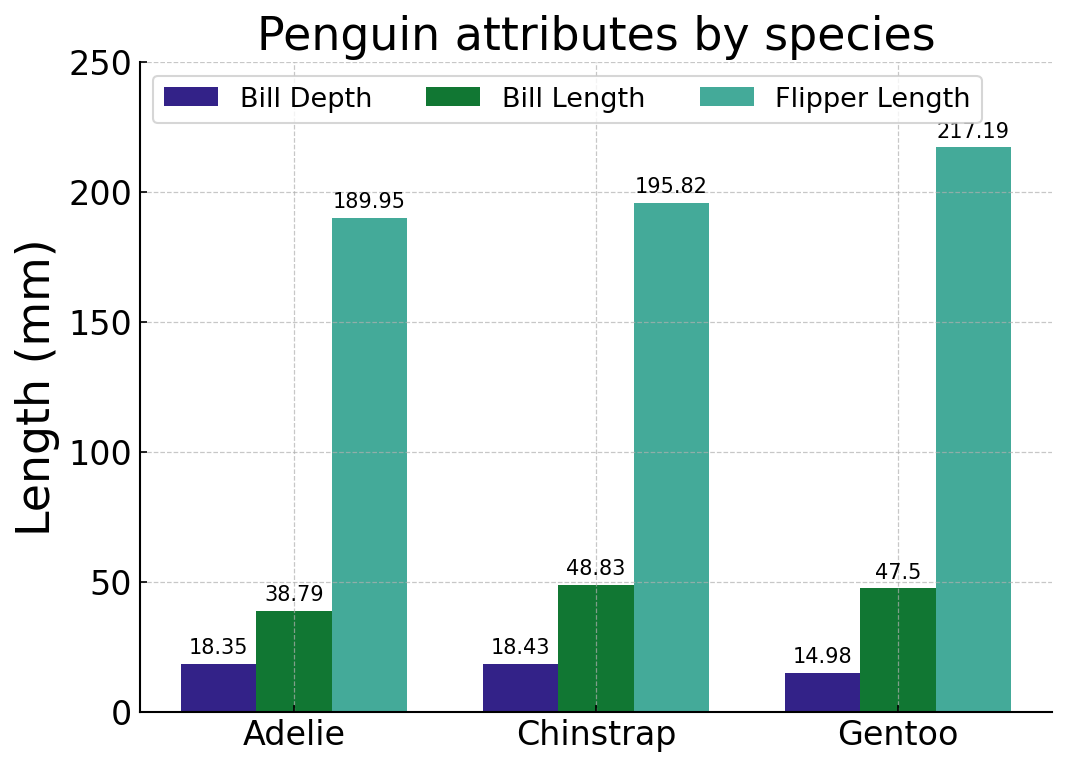

In [4]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

schemes = ("Greedy", "Random", "Random Greedy")

x = np.arange(len(schemes))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Growth Rate')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, schemes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [2]:
sys.path.insert(0, '/home/nsryan/Desktop/arfc/transition-scenarios/scripts')
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]

In [3]:
import cymetric as cym
from cymetric import graphs
import transition_metrics as tm
import dataframe_analysis as dta
import analysis as an
import collections


In [4]:
import nuclides
import fuel_transactions as tran

In [5]:
ad_reactors = {'AP1000':[1117, 0.925, 80, 'no_dist'],'Xe100': [80, 1, 60, 'no_dist'], 'MMR': [5, 1, 20, 'no_dist']}

# Scope
The scope of this notebook includes the historically deployed LWRs in the United States.

In [421]:
# current_outfile = '../output/existing_lwr_only_out.sqlite'
# current_outfile = 'test_tran_out6.sqlite'
# current_outfile = 'output/dan1_out.sqlite'
# current_outfile = 'test_tran_out6.sqlite'
# current_outfile = '../../../../../../../media/nsryan/Elements/scenes/single_reactor/multi_fuel/output/da15l2_out.sqlite'

# file = 'dr2'

# current_outfile = f'../../../../../../../media/nsryan/Elements/scenes/random_one/output/{file}_out.sqlite'
# out_base = '../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/random/'

file = 'drng'

current_outfile = f'../../../../../../../media/nsryan/Elements/scenes/random_one/{file}_out.sqlite'
out_base = '../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/random/'

## Reactor Deployment

In [ ]:
currents = ['Sinks', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment', 'LWReactors', 'XE']

In [117]:
currents = ['Sinks', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment', 'LWReactors', 'USNC']

In [210]:
currents = ['Sinks', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment', 'LWReactors', 'AP']

In [422]:
currents = ['Sinks', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment', 'LWReactors', 'USNC', 'XE', 'AP']

In [423]:
lwr_list = [
    'Arkansas_Nuclear_One_1','Arkansas_Nuclear_One_2','Beaver_Valley_1','Beaver_Valley_2','Big_Rock_Point','Braidwood_1','Braidwood_2',
    'Browns_Ferry_1','Browns_Ferry_2','Browns_Ferry_3','Brunswick_1',
    'Brunswick_2','Byron_1','Byron_2','Callaway',
    'Calvert_Cliffs_1','Calvert_Cliffs_2','Catawba_1','Catawba_2',
    'Clinton_1','Columbia','Comanche_Peak_1','Comanche_Peak_2',
    'Cook_1','Cook_2','Cooper_Station','Crystal_River_3',
    'Davis_Besse','Diablo_Canyon_1','Diablo_Canyon_2',
    'Dresden_1','Dresden_2','Dresden_3','Duane_Arnold',
    'Enrico_Fermi_2','Farley_1','Farley_2',
    'Fitzpatrick','Fort_Calhoun','Ginna',
    'Grand_Gulf_1','Haddam_Neck','Harris_1',
    'Hatch_1','Hatch_2','Hope_Creek',
    'Humboldt_Bay','Indian_Point_1','Indian_Point_2',
    'Indian_Point_3','Kewaunee','La_Crosse',
    'LaSalle_County_1','LaSalle_County_2','Limerick_1',
    'Limerick_2','Maine_Yankee','McGuire_1',
    'McGuire_2','Millstone_1','Millstone_2',
    'Millstone_3','Monticello','Nine_Mile_Point_1',
    'Nine_Mile_Point_2','North_Anna_1','North_Anna_2',
    'Oconee_1','Oconee_2','Oconee_3',
    'Oyster_Creek','Palisades','Palo_Verde_1','Palo_Verde_2',
    'Palo_Verde_3','Peach_Bottom_2','Peach_Bottom_3','Perry_1',
    'Pilgrim_1','Point_Beach_1','Point_Beach_2','Prairie_Island_1',
    'Prairie_Island_2','Quad_Cities_1','Quad_Cities_2','Rancho_Seco',
    'River_Bend_1','Robinson_2','Salem_1','Salem_2','San_Onofre_1',
    'San_Onofre_2','San_Onofre_3','Seabrook','Sequoyah_1',
    'Sequoyah_2','Shoreham','South_Texas_1','South_Texas_2',
    'St_Lucie_1','St_Lucie_2','Summer_1','Surry_1','Surry_2',
    'Susquehanna_1','Susquehanna_2','Three_Mile_Island_1','Three_Mile_Island_2',
    'Trojan','Turkey_Point_3','Turkey_Point_4','Vermont_Yankee','Vogtle_1',
    'Vogtle_2','Vogtle_3','Vogtle_4','Waterford_3','Watts_Bar_1','Watts_Bar_2',
    'Wolf_Creek_1','Yankee_Rowe','Zion_1','Zion_2'
]

In [424]:
current_reactors = tm.get_lwr_totals(current_outfile, currents)
current_reactors = dta.add_year(current_reactors, y0=1958)

In [425]:
current_reactors

Prototype,index,Time,0,AP_enter,AP1000,Arkansas_Nuclear_One_1_enter,Arkansas_Nuclear_One_2_enter,Beaver_Valley_1_enter,Beaver_Valley_2_enter,Big_Rock_Point_enter,...,Sink_LLW_exit,Mine_exit,Enrichment_exit,LWReactors_exit,USNC_exit,XE_exit,AP_exit,lwr_exit,lwr_total,Year
0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1958.00
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1958.08
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1958.17
3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1958.25
4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1958.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1747,1747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,2103.58
1748,1748,1748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,2103.67
1749,1749,1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,2103.75
1750,1750,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,2103.83


In [426]:
current_reactors.columns.to_list()

['index',
 'Time',
 0,
 'AP_enter',
 'AP1000',
 'Arkansas_Nuclear_One_1_enter',
 'Arkansas_Nuclear_One_2_enter',
 'Beaver_Valley_1_enter',
 'Beaver_Valley_2_enter',
 'Big_Rock_Point_enter',
 'Braidwood_1_enter',
 'Braidwood_2_enter',
 'Browns_Ferry_1_enter',
 'Browns_Ferry_2_enter',
 'Browns_Ferry_3_enter',
 'Brunswick_1_enter',
 'Brunswick_2_enter',
 'Byron_1_enter',
 'Byron_2_enter',
 'Callaway_enter',
 'Calvert_Cliffs_1_enter',
 'Calvert_Cliffs_2_enter',
 'Catawba_1_enter',
 'Catawba_2_enter',
 'Clinton_1_enter',
 'Columbia_enter',
 'Comanche_Peak_1_enter',
 'Comanche_Peak_2_enter',
 'Cook_1_enter',
 'Cook_2_enter',
 'Cooper_Station_enter',
 'Crystal_River_3_enter',
 'Davis_Besse_enter',
 'Diablo_Canyon_1_enter',
 'Diablo_Canyon_2_enter',
 'Dresden_1_enter',
 'Dresden_2_enter',
 'Dresden_3_enter',
 'Duane_Arnold_enter',
 'Enrichment_ap',
 'Enrichment_leu',
 'Enrichment_mmr_haleu',
 'Enrichment_xe_haleu',
 'Enrico_Fermi_2_enter',
 'Farley_1_enter',
 'Farley_2_enter',
 'Fitzpatrick_en

In [427]:
total_lwr = np.zeros(len(current_reactors))
for reactor in lwr_list:
    for time in range(len(current_reactors)):
        if reactor == 'Vogtle_4':
            total_lwr[time] += current_reactors[reactor][time]
        else:
            total_lwr[time] += current_reactors[reactor + '_enter'][time]
            total_lwr[time] += current_reactors[reactor + '_exit'][time]

In [ ]:
total_mmr_reactors = np.array(current_reactors['MMR'].to_list())

In [ ]:
total_xe_reactors = np.array(current_reactors['Xe100'].to_list())

In [216]:
total_ap_reactors = np.array(current_reactors['AP1000'].to_list())

In [ ]:
# create a dataframe out of the total_xeh and total_xel arrays
total_xe = pd.DataFrame({'Year': current_reactors['Year'],'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),'Xe100': total_xe_reactors, 'Total_Xe100': total_xe_reactors.cumsum()})

In [428]:
total_mmrl = np.zeros(len(current_reactors))
if 'MMRl_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_mmrl[time] += current_reactors['MMRl_enter'][time]
        total_mmrl[time] += current_reactors['MMRl_exit'][time]
elif 'MMRl' in current_reactors.columns:
    total_mmrl = np.array(current_reactors['MMRl'].to_list())
else:
    pass

total_mmrh = np.zeros(len(current_reactors))
if 'MMRh_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_mmrh[time] += current_reactors['MMRh_enter'][time]
        total_mmrh[time] += current_reactors['MMRh_exit'][time]
elif 'MMRh' in current_reactors.columns:
    total_mmrh = np.array(current_reactors['MMRh'].to_list())
elif 'MMR_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_mmrh[time] += current_reactors['MMR_enter'][time]
        total_mmrh[time] += current_reactors['MMR_exit'][time]
elif 'MMR' in current_reactors.columns:
    total_mmrh = np.array(current_reactors['MMR'].to_list())
else:
    pass

In [429]:
total_ap_reactors = np.zeros(len(current_reactors))
if 'AP1000_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_ap_reactors[time] += current_reactors['AP1000_enter'][time]
        total_ap_reactors[time] += current_reactors['AP1000_exit'][time]
elif 'AP1000' in current_reactors.columns:
    total_ap_reactors = np.array(current_reactors['AP1000'].to_list())
else:
    pass

In [218]:
total_ap = pd.DataFrame({'Year': current_reactors['Year'], 'AP1000': total_ap_reactors, 'Total_AP1000': total_ap_reactors.cumsum()})

In [219]:
save = f'reactors/{file}_reactors'
total_ap.to_csv(out_base + save + '.csv', index=False)

In [430]:
total_xel = np.zeros(len(current_reactors))
if 'Xe100l_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_xel[time] += current_reactors['Xe100l_enter'][time]
        total_xel[time] += current_reactors['Xe100l_exit'][time]
elif 'Xe100l' in current_reactors.columns:
    total_xel = np.array(current_reactors['Xe100l'].to_list())
else:
    pass

total_xeh = np.zeros(len(current_reactors))
if 'Xe100h_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_xeh[time] += current_reactors['Xe100h_enter'][time]
        total_xeh[time] += current_reactors['Xe100h_exit'][time]
elif 'Xe100h' in current_reactors.columns:
    total_xeh = np.array(current_reactors['Xe100h'].to_list())
elif 'Xe100_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_xeh[time] += current_reactors['Xe100_enter'][time]
        total_xeh[time] += current_reactors['Xe100_exit'][time]
elif 'Xe100' in current_reactors.columns:
    total_xeh = np.array(current_reactors['Xe100'].to_list())
else:
    pass

In [431]:
total_reactors = pd.DataFrame({'Year': current_reactors['Year'],
    'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),
    'MMRl': total_mmrl, 'Total MMRl': total_mmrl.cumsum(),
    'MMRh': total_mmrh, 'Total MMRh': total_mmrh.cumsum(),
    'Xe100l': total_xel, 'Total Xe100l': total_xel.cumsum(),
    'Xe100h': total_xeh, 'Total Xe100h': total_xeh.cumsum(),
    'AP1000': total_ap_reactors, 'Total AP1000': total_ap_reactors.cumsum()})

save = f'reactors/{file}_reactors'
total_reactors.to_csv(out_base + save + '.csv', index=False)

In [16]:
total_mmr = pd.DataFrame({'Year': current_reactors['Year'],'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),'MMR': total_mmrh, 'Total MMR': total_mmrh.cumsum()})

In [124]:
total_mmr = pd.DataFrame({'Year': current_reactors['Year'],'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),'MMRh': total_mmrh, 'Total MMRh': total_mmrh.cumsum(),'MMRl': total_mmrl, 'Total MMRl': total_mmrl.cumsum()})

In [ ]:
total_xe = pd.DataFrame({'Year': current_reactors['Year'],'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),'Xe100h': total_xeh, 'Total Xe100h': total_xeh.cumsum()})

In [ ]:
# create a dataframe out of the total_xeh and total_xel arrays
total_xe = pd.DataFrame({'Year': current_reactors['Year'],'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),'Xe100h': total_xeh, 'Total Xe100h': total_xeh.cumsum(), 'Xe100l': total_xel, 'Total Xe100l': total_xel.cumsum()})

In [ ]:
total_mmr.plot(x='Year')
plt.yscale('log')

In [125]:
save = f'reactors/{file}_reactors'
total_mmr.to_csv(out_base + save + '.csv', index=False)

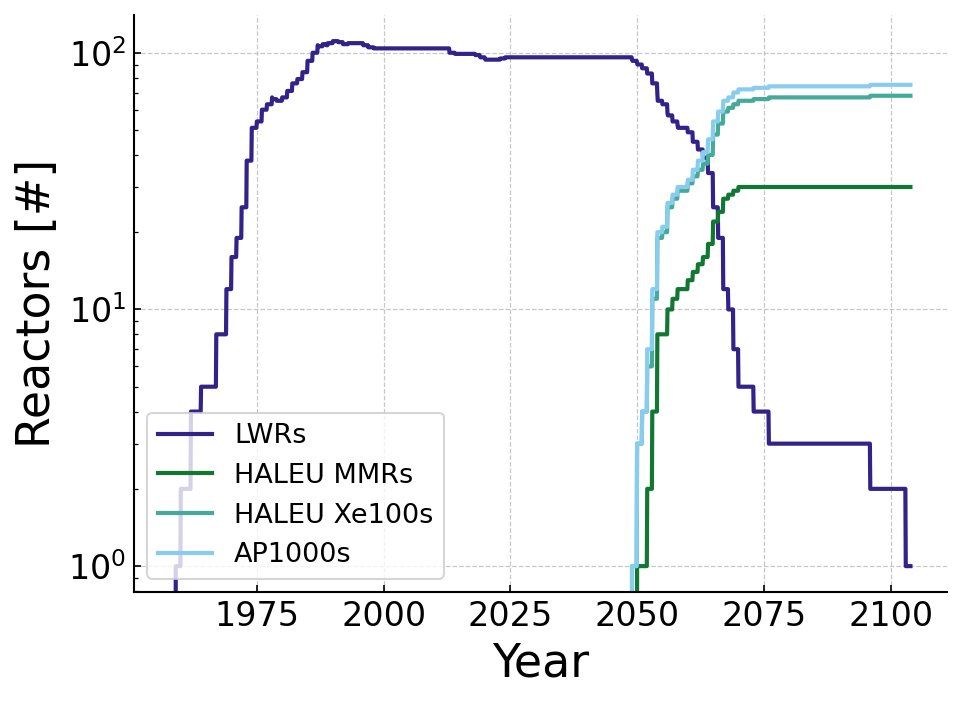

In [432]:
plt.plot(current_reactors['Year'], total_lwr.cumsum(), label='LWRs')

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_mmrh.cumsum(), label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_mmrl.cumsum(), label='LEU+ MMRs LEU')
if 'MMR' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_mmr_reactors.cumsum(), label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_mmrh.cumsum(), label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xeh.cumsum(), label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xel.cumsum(), label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xeh.cumsum(), label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xeh.cumsum(), label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xeh.cumsum(), label='HALEU Xe100s')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_ap.cumsum(), label='AP1000s')
if 'AP1000' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_ap_reactors.cumsum(), label='AP1000s')

#plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Reactors [#]')
plt.yscale('log')
plt.legend()

plt.savefig(out_base + save + '.pdf')

## Energy Output

In [ ]:
file = 'da15l2'

current_outfile = f'../../../../../../../media/nsryan/Elements/scenes/single_reactor/one_fuel/output/{file}_out.sqlite'
out_base = '../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/single_one/'

current_reactors = tm.get_lwr_totals(current_outfile, currents)
current_reactors = dta.add_year(current_reactors, y0=1958)

In [433]:
current_energy = tm.get_annual_electricity(current_outfile)

In [434]:
energy_ap = np.zeros(len(total_reactors))

for time in range(len(total_reactors)):
    if time + ad_reactors['AP1000'][2] * 12 < len(total_reactors):
        energy_ap[time: time + ad_reactors['AP1000'][2] * 12] += current_reactors['AP1000'][time] * ad_reactors['AP1000'][0]/1000
    else:
        energy_ap[time:] += current_reactors['AP1000'][time] * ad_reactors['AP1000'][0]/1000

# convert the monthly energy to annual energy
energy_ap_ye = energy_ap[::12]
energy_ap_ye = energy_ap_ye[1:]

In [223]:
total_ap = pd.DataFrame({'Year': current_energy['Year'], 'System Energy (GWe-y)': current_energy['Energy'], 'AP1000 (GWe-y)': energy_ap_ye, 'Total AP1000 (GWe-y)': energy_ap_ye.cumsum()})

In [224]:
save = f'energy/{file}_energy'
total_ap.to_csv(out_base + save + '.csv', index=False)

In [ ]:
energy_xe = np.zeros(len(current_reactors))

for time in range(len(current_reactors)):
    if time + ad_reactors['Xe100'][2]*12 < len(current_reactors):
        energy_xe[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100_enter'][time] * ad_reactors['Xe100'][0]/1000
    else:
        energy_xe[time:] += current_reactors['Xe100_enter'][time] * ad_reactors['Xe100'][0]/1000

# convert the monthly energy to annual energy
energy_xe_ye = energy_xe[::12]
energy_xe_ye = energy_xe_ye[1:]

In [ ]:
total_xe = pd.DataFrame({'Year': current_energy['Year'], 'System Energy (GWe-y)': current_energy['Energy'], 'Xe100 (GWe-y)': energy_xe_ye, 'Total Xe100 (GWe-y)': energy_xe_ye.cumsum()})

In [435]:
energy_mmrl = np.zeros(len(total_mmrl))
if 'MMRl_enter' in current_reactors.columns:
    for time in range(len(total_mmrl)):
        if time + ad_reactors['MMR'][2] * 12 < len(total_mmrl):
            energy_mmrl[time: time + ad_reactors['MMR'][2] * 12] += current_reactors['MMRl_enter'][time] * ad_reactors['MMR'][0]/1000
        else:
            energy_mmrl[time:] += current_reactors['MMRl_enter'][time] * ad_reactors['MMR'][0]

energy_mmrh = np.zeros(len(total_mmrh))

if 'MMRh_enter' in current_reactors.columns:
    for time in range(len(total_mmrh)):
        if time + ad_reactors['MMR'][2] * 12 < len(total_mmrh):
            energy_mmrh[time: time + ad_reactors['MMR'][2] * 12] += current_reactors['MMRh_enter'][time] * ad_reactors['MMR'][0]/1000
        else:
            energy_mmrh[time:] += current_reactors['MMRh_enter'][time] * ad_reactors['MMR'][0]/1000
if 'MMR_enter' in current_reactors.columns:
    for time in range(len(total_mmrh)):
        if time + ad_reactors['MMR'][2] * 12 < len(total_mmrh):
            energy_mmrh[time: time + ad_reactors['MMR'][2] * 12] += current_reactors['MMR_enter'][time] * ad_reactors['MMR'][0]/1000
        else:
            energy_mmrh[time:] += current_reactors['MMR_enter'][time] * ad_reactors['MMR'][0]/1000

energy_mmr_total = energy_mmrl + energy_mmrh

# convert the monthly energy to annual energy
energy_mmrh_ye = energy_mmrh[::12]
energy_mmrh_ye = energy_mmrh_ye[1:]

energy_mmrl_ye = energy_mmrl[::12]
energy_mmrl_ye = energy_mmrl_ye[1:]

energy_mmr_ye_tot = energy_mmr_total[::12]
energy_mmr_ye_tot = energy_mmr_ye_tot[1:]

In [345]:
current_reactors.columns.to_list()

['index',
 'Time',
 0,
 'AP_enter',
 'AP1000',
 'Arkansas_Nuclear_One_1_enter',
 'Arkansas_Nuclear_One_2_enter',
 'Beaver_Valley_1_enter',
 'Beaver_Valley_2_enter',
 'Big_Rock_Point_enter',
 'Braidwood_1_enter',
 'Braidwood_2_enter',
 'Browns_Ferry_1_enter',
 'Browns_Ferry_2_enter',
 'Browns_Ferry_3_enter',
 'Brunswick_1_enter',
 'Brunswick_2_enter',
 'Byron_1_enter',
 'Byron_2_enter',
 'Callaway_enter',
 'Calvert_Cliffs_1_enter',
 'Calvert_Cliffs_2_enter',
 'Catawba_1_enter',
 'Catawba_2_enter',
 'Clinton_1_enter',
 'Columbia_enter',
 'Comanche_Peak_1_enter',
 'Comanche_Peak_2_enter',
 'Cook_1_enter',
 'Cook_2_enter',
 'Cooper_Station_enter',
 'Crystal_River_3_enter',
 'Davis_Besse_enter',
 'Diablo_Canyon_1_enter',
 'Diablo_Canyon_2_enter',
 'Dresden_1_enter',
 'Dresden_2_enter',
 'Dresden_3_enter',
 'Duane_Arnold_enter',
 'Enrichment_ap',
 'Enrichment_leu',
 'Enrichment_mmr_haleu',
 'Enrichment_xe_haleu',
 'Enrico_Fermi_2_enter',
 'Farley_1_enter',
 'Farley_2_enter',
 'Fitzpatrick_en

In [436]:
energy_xeh = np.zeros(len(total_xeh))

if 'Xe100h_enter' in current_reactors.columns:
    for time in range(len(total_xeh)):
        if time + ad_reactors['Xe100'][2] * 12 < len(total_xeh):
            energy_xeh[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100h_enter'][time] * ad_reactors['Xe100'][0]/1000
        else:
            energy_xeh[time:] += current_reactors['Xe100h_enter'][time] * ad_reactors['Xe100'][0]/1000
if 'Xe100_enter' in current_reactors.columns:
    for time in range(len(total_xeh)):
        if time + ad_reactors['Xe100'][2] * 12 < len(total_xeh):
            energy_xeh[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100_enter'][time] * ad_reactors['Xe100'][0]/1000
        else:
            energy_xeh[time:] += current_reactors['Xe100_enter'][time] * ad_reactors['Xe100'][0]/1000
if 'Xe100h' in current_reactors.columns:
    for time in range(len(total_xeh)):
        if time + ad_reactors['Xe100'][2] * 12 < len(total_xeh):
            energy_xeh[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100h'][time] * ad_reactors['Xe100'][0]/1000
        else:
            energy_xeh[time:] += current_reactors['Xe100h'][time] * ad_reactors['Xe100'][0]/1000
if 'Xe100' in current_reactors.columns:
    for time in range(len(total_xeh)):
        if time + ad_reactors['Xe100'][2] * 12 < len(total_xeh):
            energy_xeh[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100'][time] * ad_reactors['Xe100'][0]/1000
        else:
            energy_xeh[time:] += current_reactors['Xe100'][time] * ad_reactors['Xe100'][0]/1000

energy_xel = np.zeros(len(total_xel))

if 'Xe100l_enter' in current_reactors.columns:
    for time in range(len(total_xel)):
        if time + ad_reactors['Xe100'][2] * 12 < len(total_xel):
            energy_xel[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100l_enter'][time] * ad_reactors['Xe100'][0]/1000
        else:
            energy_xel[time:] += current_reactors['Xe100l_enter'][time] * ad_reactors['Xe100'][0]/1000
if 'Xe100l' in current_reactors.columns:
    for time in range(len(total_xeh)):
        if time + ad_reactors['Xe100'][2] * 12 < len(total_xeh):
            energy_xeh[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100l'][time] * ad_reactors['Xe100'][0]/1000
        else:
            energy_xeh[time:] += current_reactors['Xe100l'][time] * ad_reactors['Xe100'][0]/1000


energy_xe_total = energy_xel + energy_xeh

# convert the monthly energy to annual energy
energy_xeh_ye = energy_xeh[::12]
energy_xeh_ye = energy_xeh_ye[1:]

energy_xel_ye = energy_xel[::12]
energy_xel_ye = energy_xel_ye[1:]

energy_xe_ye_tot = energy_xe_total[::12]
energy_xe_ye_tot = energy_xe_ye_tot[1:]

In [437]:
lwr_energy = current_energy['Energy'] - energy_ap_ye - energy_xe_ye_tot - energy_mmr_ye_tot

total_ar = energy_ap_ye + energy_xe_ye_tot + energy_mmr_ye_tot

total_energy = pd.DataFrame({'Year': current_energy['Year'],
'System Energy (GWe-y)': current_energy['Energy'],
'LWRs (GWe-y)': lwr_energy, 'Total LWRs (GWe-y)': lwr_energy.cumsum(),
'AP1000 (GWe-y)': energy_ap_ye, 'Total AP1000 (GWe-y)': energy_ap_ye.cumsum(),'Xe100h (GWe-y)': energy_xeh_ye, 'Total Xe100h (GWe-y)': energy_xeh_ye.cumsum(),'Xe100l (GWe-y)': energy_xel_ye, 'Total Xe100l (GWe-y)': energy_xel_ye.cumsum(),'Xe100 (GWe-y)': energy_xe_ye_tot, 'Total Xe100 (GWe-y)': energy_xe_ye_tot.cumsum(),
'MMRh (GWe-y)': energy_mmrh_ye, 'Total MMRh (GWe-y)': energy_mmrh_ye.cumsum(),
'MMRl (GWe-y)': energy_mmrl_ye, 'Total MMRl (GWe-y)': energy_mmrl_ye.cumsum(),
'MMR (GWe-y)': energy_mmr_ye_tot, 'Total MMR (GWe-y)': energy_mmr_ye_tot.cumsum(),
'ARs (GWe-y)': total_ar, 'Total ARs (GWe-y)': total_ar.cumsum()})

save = f'energy/{file}_energy'
total_energy.to_csv(out_base + save + '.csv', index=False)

In [ ]:
plt.plot(energy_mmr_total)
plt.plot(energy_mmr_ye_tot)

In [92]:
total_mmr = pd.DataFrame({'Year': current_energy['Year'], 'System Energy (GWe-y)': current_energy['Energy'], 'MMRl (GWe-y)': energy_mmrl_ye, 'Total MMRl (GWe-y)': energy_mmrl_ye.cumsum(), 'MMRh (GWe-y)': energy_mmrh_ye, 'Total MMRh (GWe-y)': energy_mmrh_ye.cumsum(), 'MMRs (GWe-y)': energy_mmr_ye_tot, 'Total MMR (GWe-y)': energy_mmr_ye_tot.cumsum()})

# 'Xe100l (GWe-y)': energy_xel_ye, 'Total Xe100l (GWe-y)': energy_xel_ye.cumsum(),

In [93]:
save = f'energy/{file}_energy'
total_mmr.to_csv(out_base + save + '.csv', index=False)

In [ ]:
total_xe = pd.DataFrame({'Year': current_energy['Year'], 'System Energy (GWe-y)': current_energy['Energy'], 'Xe100h (GWe-y)': energy_xeh_ye, 'Total Xe100h (GWe-y)': energy_xeh_ye.cumsum(), 'Xe100l (GWe-y)': energy_xel_ye, 'Total Xe100l (GWe-y)': energy_xel_ye.cumsum(), 'Xe100 (GWe-y)': energy_xe_ye_tot, 'Total Xe100 (GWe-y)': energy_xe_ye_tot.cumsum()})

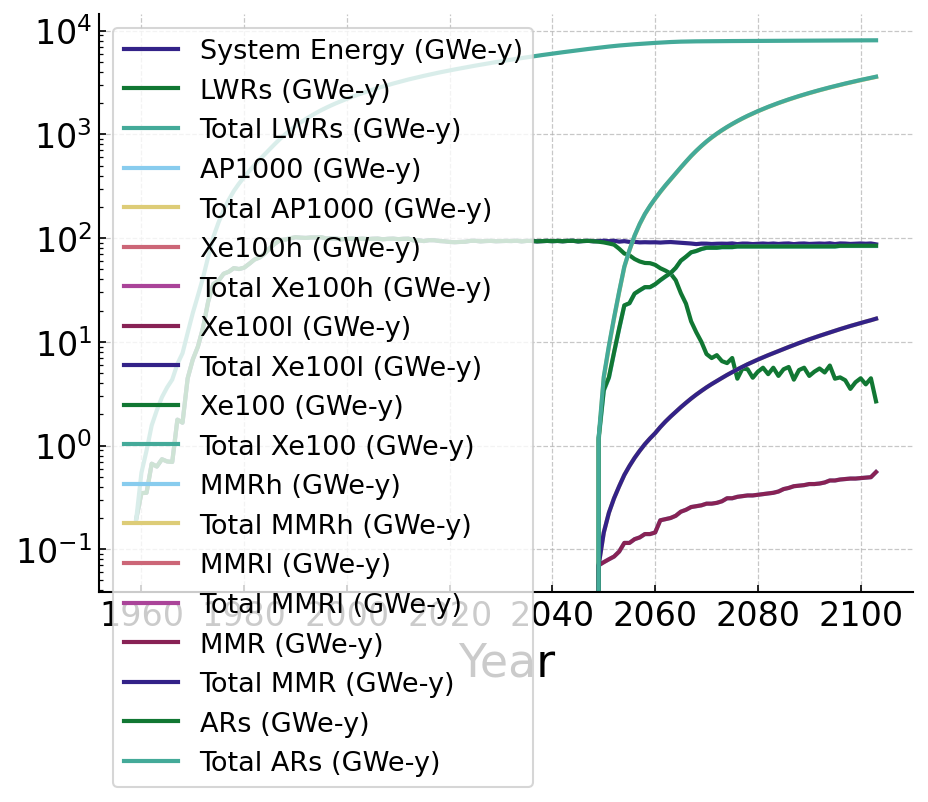

In [344]:
total_energy.plot(x='Year')
plt.yscale('log')

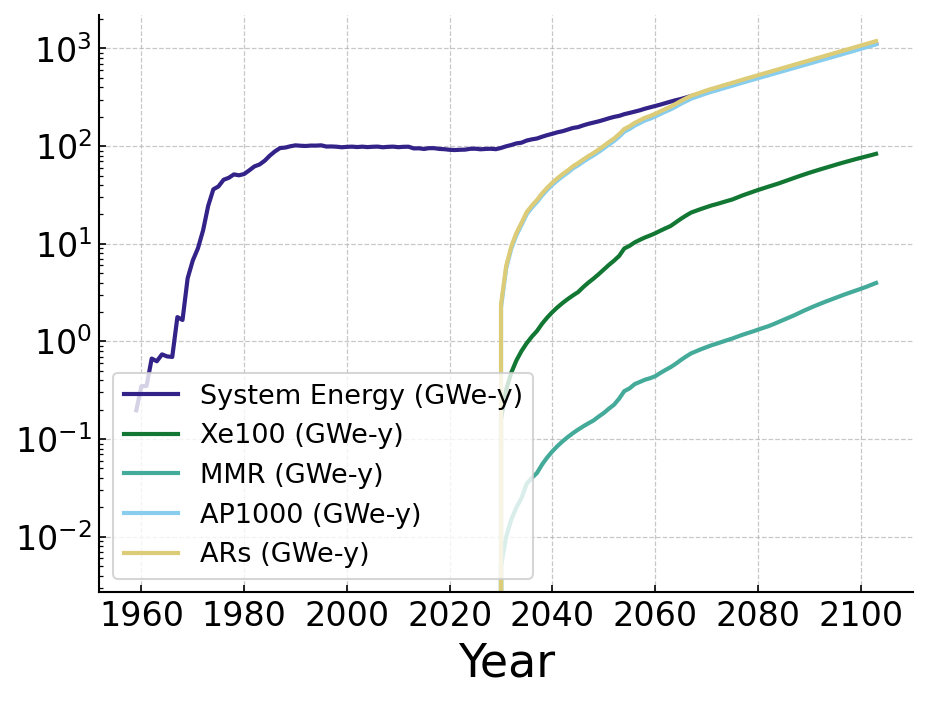

In [227]:
# plt.plot(total_energy['Year'], total_energy['System Energy (GWe-y)'], label='System Energy')
# plt.plot(total_energy['Year'], total_energy['MMR (GWe-y)'], label='MMRs')
total_energy[['Year', 'System Energy (GWe-y)', 'Xe100 (GWe-y)', 'MMR (GWe-y)', 'AP1000 (GWe-y)', 'ARs (GWe-y)']].plot(x='Year')
plt.yscale('log')

In [ ]:
save = f'energy/{file}_energy'
total_xe.to_csv(out_base + save + '.csv', index=False)

In [343]:
total_energy

,Year,System Energy (GWe-y),LWRs (GWe-y),Total LWRs (GWe-y),AP1000 (GWe-y),Total AP1000 (GWe-y),Xe100h (GWe-y),Total Xe100h (GWe-y),Xe100l (GWe-y),Total Xe100l (GWe-y),Xe100 (GWe-y),Total Xe100 (GWe-y),MMRh (GWe-y),Total MMRh (GWe-y),MMRl (GWe-y),Total MMRl (GWe-y),MMR (GWe-y),Total MMR (GWe-y),ARs (GWe-y),Total ARs (GWe-y)
0,1959,0.197000,0.197000,0.197000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000
1,1960,0.347583,0.347583,0.544583,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000
2,1961,0.350083,0.350083,0.894667,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000
3,1962,0.667583,0.667583,1.562250,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000
4,1963,0.627000,0.627000,2.189250,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2099,88.327917,4.072917,8055.233250,83.775,3243.768,0.0,0.0,0.0,0.0,0.0,0.0,0.480,14.680,0.0,0.0,0.480,14.680,84.255,3258.448
141,2100,88.705250,4.445250,8059.678500,83.775,3327.543,0.0,0.0,0.0,0.0,0.0,0.0,0.485,15.165,0.0,0.0,0.485,15.165,84.260,3342.708
142,2101,88.151750,3.886750,8063.565250,83.775,3411.318,0.0,0.0,0.0,0.0,0.0,0.0,0.490,15.655,0.0,0.0,0.490,15.655,84.265,3426.973
143,2102,88.715250,4.445250,8068.010500,83.775,3495.093,0.0,0.0,0.0,0.0,0.0,0.0,0.495,16.150,0.0,0.0,0.495,16.150,84.270,3511.243


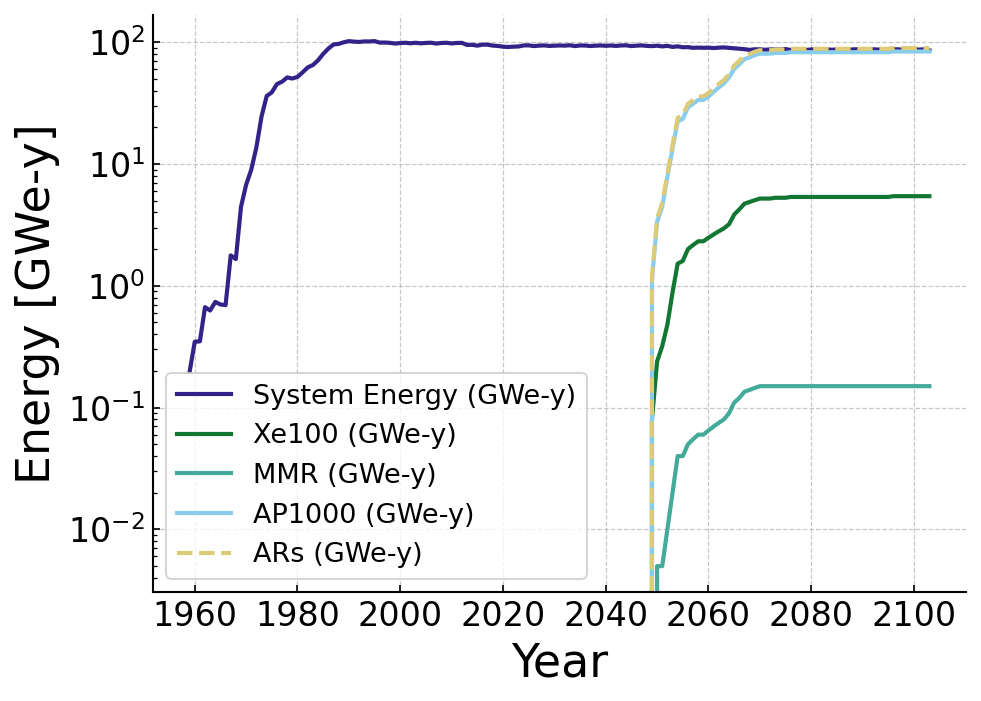

In [438]:
total_energy[['Year', 'System Energy (GWe-y)', 'Xe100 (GWe-y)', 'MMR (GWe-y)', 'AP1000 (GWe-y)', 'ARs (GWe-y)']].plot(x='Year', style=['-', '-', '-', '-', '--'])
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Energy [GWe-y]')
plt.legend()

plt.savefig(out_base + save + '_total_ars' + '.pdf')

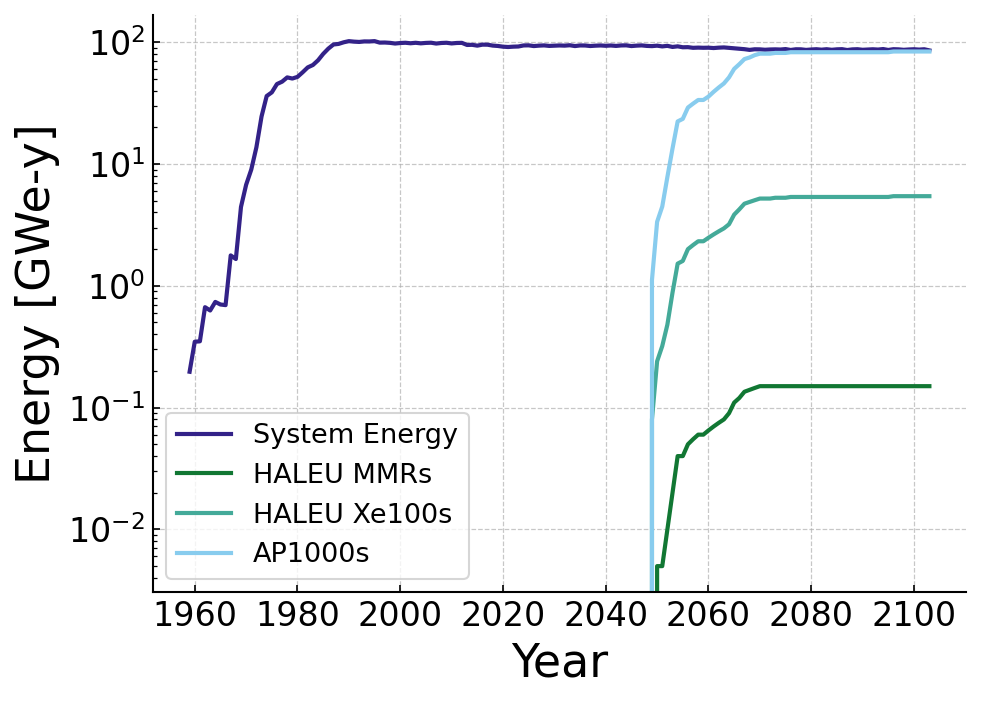

In [439]:
plt.plot(total_energy['Year'], total_energy['System Energy (GWe-y)'], label='System Energy')

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['MMRh (GWe-y)'], label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['MMRl (GWe-y)'], label='LEU+ MMRs')
if 'MMR' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['MMRh (GWe-y)'], label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['MMRh (GWe-y)'], label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Xe100h (GWe-y)'], label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Xe100l (GWe-y)'], label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Xe100h (GWe-y)'], label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Xe100h (GWe-y)'], label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Xe100h (GWe-y)'], label='HALEU Xe100s')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['AP1000 (GWe-y)'], label='AP1000s')
if 'AP1000' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['AP1000 (GWe-y)'], label='AP1000s')


plt.yscale('log')
#plt.title('Energy Generation Each Year')
plt.xlabel('Year')
plt.ylabel('Energy [GWe-y]')
plt.legend()

plt.savefig(out_base + save + '_by_fuel' + '.pdf')

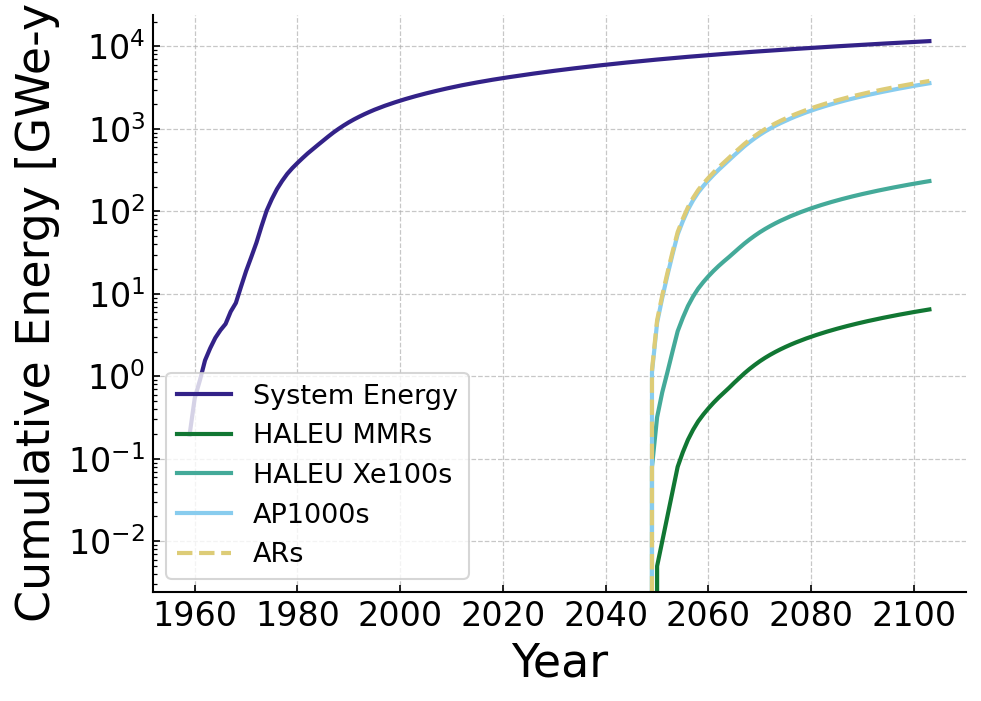

In [440]:
plt.plot(total_energy['Year'], total_energy['System Energy (GWe-y)'].cumsum(), label='System Energy')


if 'MMRh_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total MMRh (GWe-y)'], label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total MMRl (GWe-y)'], label='LEU+ MMRs')
if 'MMR' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total MMRh (GWe-y)'], label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total MMRh (GWe-y)'], label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total Xe100h (GWe-y)'], label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total Xe100l (GWe-y)'], label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total Xe100h (GWe-y)'], label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total Xe100h (GWe-y)'], label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total Xe100h (GWe-y)'], label='HALEU Xe100s')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total AP1000 (GWe-y)'], label='AP1000s')
if 'AP1000' in current_reactors.columns:
    plt.plot(total_energy['Year'], total_energy['Total AP1000 (GWe-y)'], label='AP1000s')

plt.plot(total_energy['Year'], total_energy['Total ARs (GWe-y)'], label='ARs', linestyle='--')


plt.yscale('log')
#plt.title('Energy Generation Each Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Energy [GWe-y]')
plt.legend()

plt.savefig(out_base + save + '_cumulative_by_fuel' + '.pdf')

## Material Transactions

In [ ]:
file = 'dal1'

current_outfile = f'../../../../../../../media/nsryan/Elements/scenes/single_reactor/multi_fuel/output/{file}_out.sqlite'
out_base = '../../../../../../../media/nsryan/Elements/scenes/analysis/multi_fuel/single_one/'

In [441]:
current_transactions = tm.add_receiver_prototype(current_outfile)

In [442]:
current_uox = dta.commodity_mass_traded(current_transactions, 'fresh_uox')

In [443]:
current_ap_uox = dta.commodity_mass_traded(current_transactions, 'fresh_ap_uox')

In [444]:
current_xe_leup = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_leup')
current_xe_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_haleu')

In [445]:
current_mmr_leup = dta.commodity_mass_traded(current_transactions, 'fresh_mmr_leup')
current_mmr_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_mmr_haleu')

In [446]:
total_fresh = pd.DataFrame({'Year': current_uox['Year'],
'UOx': current_uox['Quantity'], 'Total UOx': current_uox['Quantity'].cumsum(),
'AP UOx': current_ap_uox['Quantity'], 'Total AP UOx': current_ap_uox['Quantity'].cumsum(),
'Xe100h': current_xe_haleu['Quantity'], 'Total Xe100h': current_xe_haleu['Quantity'].cumsum(),
'Xe100l': current_xe_leup['Quantity'], 'Total Xe100l': current_xe_leup['Quantity'].cumsum(),
'MMRh': current_mmr_haleu['Quantity'], 'Total MMRh': current_mmr_haleu['Quantity'].cumsum(),
'MMRl': current_mmr_leup['Quantity'], 'Total MMRl': current_mmr_leup['Quantity'].cumsum()})

save = f'fresh/{file}_fresh_fuel'
total_fresh.to_csv(out_base + save + '.csv', index=False)

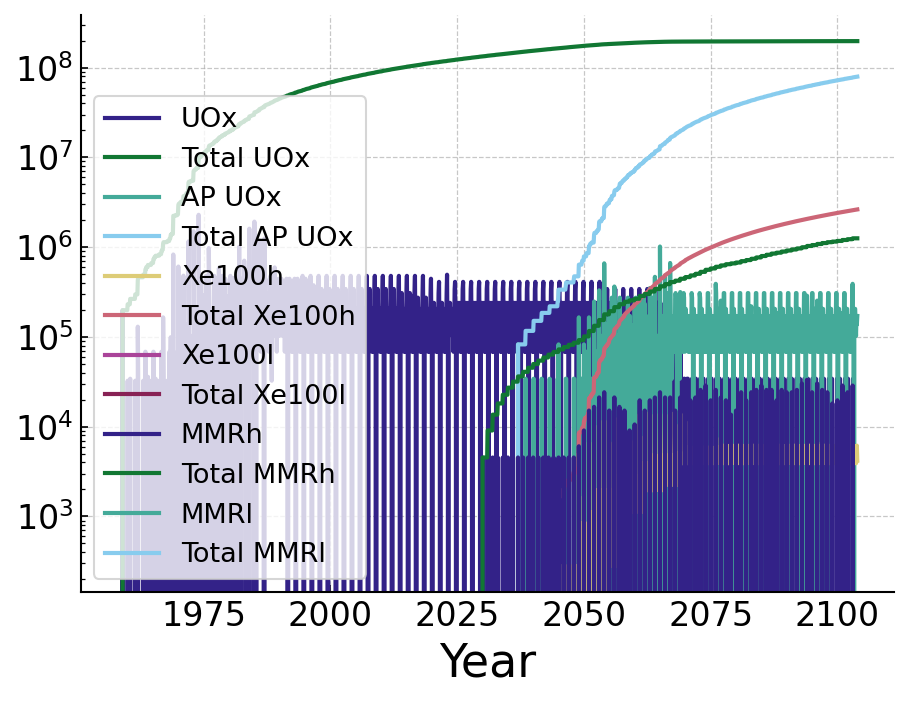

In [141]:
total_fresh.plot(x='Year')
plt.yscale('log')

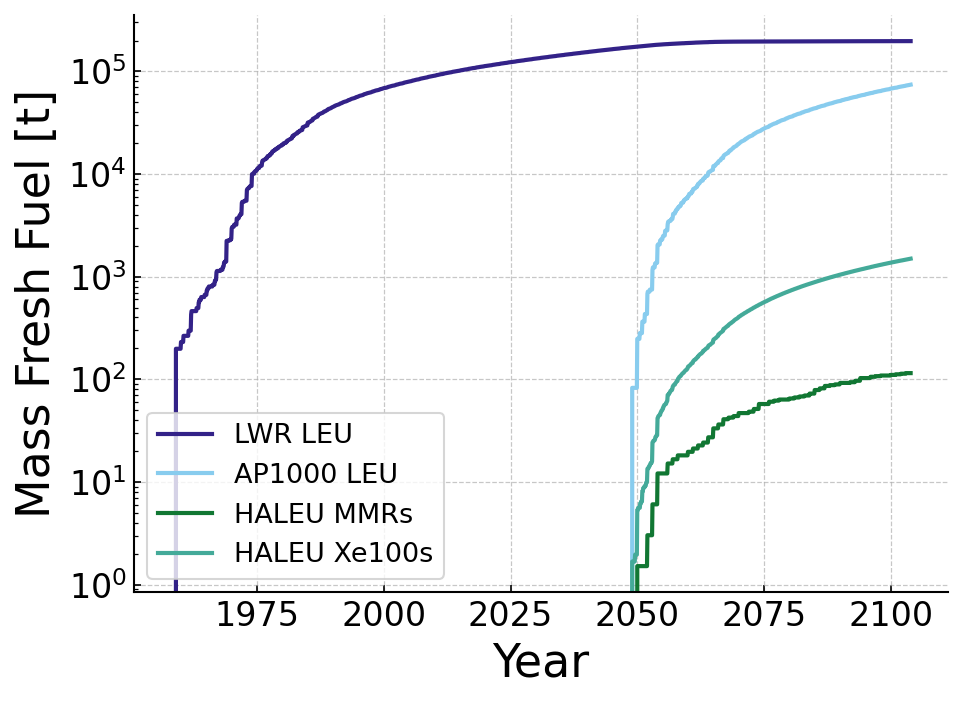

In [447]:
plt.plot(total_fresh['Year'], total_fresh['UOx'].cumsum()/1000, label='LWR LEU')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total AP UOx']/1000, label='AP1000s', color=mycolors[3])
if 'AP1000' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total AP UOx']/1000, label='AP1000 LEU', color=mycolors[3])

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total MMRh']/1000, label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total MMRl']/1000, label='LEU+ MMRs')
if 'MMR' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total MMRh']/1000, label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total MMRh']/1000, label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total Xe100l']/1000, label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Total Xe100h']/1000, label='HALEU Xe100s')

plt.legend() #(loc=2)
plt.ylabel('Mass Fresh Fuel [t]')
plt.xlabel('Year')
plt.yscale('log')

plt.savefig(out_base + save + '_cumulative_by_fuel' + '.pdf')

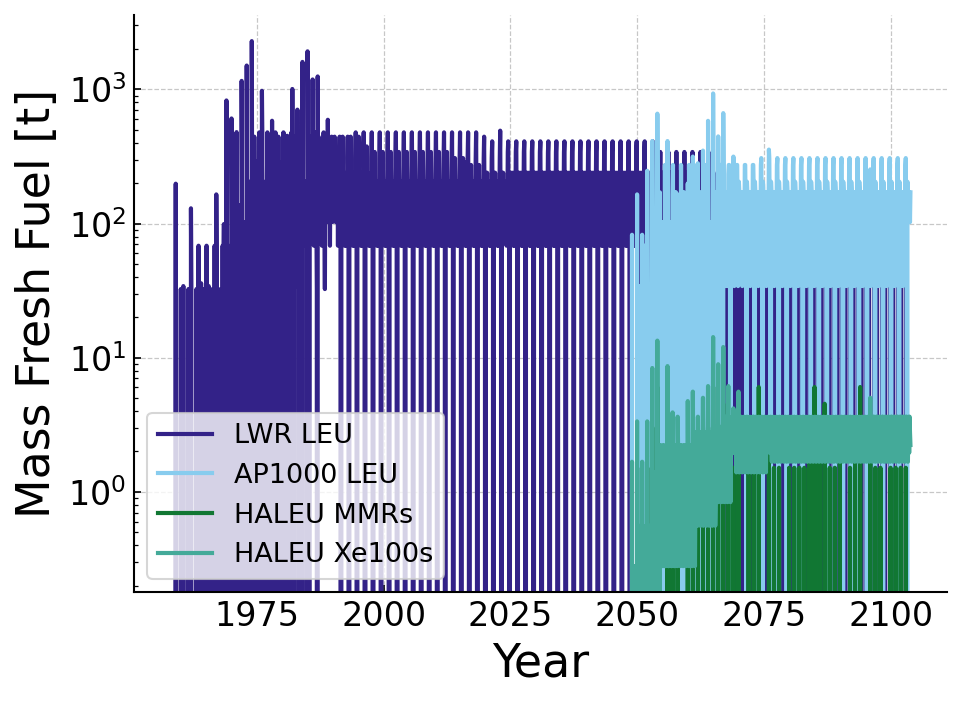

In [448]:
plt.plot(total_fresh['Year'], total_fresh['UOx']/1000, label='LWR LEU')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['AP UOx']/1000, label='AP1000 LEU', color=mycolors[3])
if 'AP1000' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['AP UOx']/1000, label='AP1000 LEU', color=mycolors[3])

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['MMRh']/1000, label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['MMRl']/1000, label='LEU+ MMRs')
if 'MMR' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['MMRh']/1000, label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['MMRh']/1000, label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Xe100l']/1000, label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(total_fresh['Year'], total_fresh['Xe100h']/1000, label='HALEU Xe100s')

plt.legend() #(loc=2)
plt.ylabel('Mass Fresh Fuel [t]')
plt.xlabel('Year')
plt.yscale('log')

plt.savefig(out_base + save + '_by_fuel' + '.pdf')

In [192]:
total_fresh_ap = pd.DataFrame({'Year': current_uox['Year'], 'UOX': current_uox['Quantity'], 'Total UOX': current_uox['Quantity'].cumsum(), 'AP UOX': current_ap_uox['Quantity'], 'Total AP UOX': current_ap_uox['Quantity'].cumsum()})

In [193]:
save = f'fresh/{file}_fresh_fuel'
total_fresh_ap.to_csv(out_base + save + '.csv', index=False)

In [ ]:
current_xe_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_haleu')

In [ ]:
# create a pandas dataframe out of the current_uox array and current_xe_haleu array
total_fresh = pd.DataFrame({'Year': current_uox['Year'],'UOX': current_uox['Quantity'], 'Total UOX': current_uox['Quantity'].cumsum(), 'Xe100 HALEU': current_xe_haleu['Quantity'], 'Total Xe100 HALEU': current_xe_haleu['Quantity'].cumsum()})

In [96]:
current_mmr_leup = dta.commodity_mass_traded(current_transactions, 'fresh_mmr_leup')
current_mmr_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_mmr_haleu')

In [ ]:
current_xe_leup = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_leup')
current_xe_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_haleu')

In [ ]:
# create a pandas dataframe out of the current_uox array and current_xe_haleu array
total_fresh_xe = pd.DataFrame({'Year': current_uox['Year'],'UOX': current_uox['Quantity'], 'Total UOX': current_uox['Quantity'].cumsum(), 'Xe100 HALEU': current_xe_haleu['Quantity'], 'Total Xe100 HALEU': current_xe_haleu['Quantity'].cumsum(), 'Xe100 LEU+': current_xe_leup['Quantity'], 'Total Xe100 LEU+': current_xe_leup['Quantity'].cumsum()})

In [ ]:
save = f'fresh/{file}_fresh_fuel'
total_fresh_xe.to_csv(out_base + save + '.csv', index=False)

In [ ]:
total_fresh_mmr = pd.DataFrame({'Year': current_uox['Year'],'UOX': current_uox['Quantity'], 'Total UOX': current_uox['Quantity'].cumsum(), 'MMR HALEU': current_mmr_haleu['Quantity'], 'Total MMR HALEU': current_mmr_haleu['Quantity'].cumsum()})

In [ ]:
total_fresh_mmr = pd.DataFrame({'Year': current_uox['Year'],'UOX': current_uox['Quantity'], 'Total UOX': current_uox['Quantity'].cumsum(), 'MMR HALEU': current_mmr_haleu['Quantity'], 'Total MMR HALEU': current_mmr_haleu['Quantity'].cumsum(), 'MMR LEU+': current_mmr_leup['Quantity'], 'Total MMR LEU+': current_mmr_leup['Quantity'].cumsum()})

In [100]:
save = f'fresh/{file}_fresh_fuel'
total_fresh_mmr.to_csv(out_base + save + '.csv', index=False)

In [ ]:
# Comparing fresh_uox transactions to all reactors

plt.plot(current_uox['Year'], current_uox['Quantity'].cumsum()/1000,
         label='Fresh LWR LEU')

# plt.plot(current_ap_uox['Year'], current_ap_uox['Quantity'].cumsum()/1000, label='Fresh AP LEU')

plt.plot(current_uox['Year'], current_mmr_leup['Quantity'].cumsum()/1000,
         label='Fresh MMR LEU+')
plt.plot(current_uox['Year'], current_mmr_haleu['Quantity'].cumsum()/1000,
         label='Fresh MMR HALEU', linestyle='--')

# plt.plot(current_xe_leup['Year'], current_xe_leup['Quantity'].cumsum()/1000,
#          label='Fresh Xe100 LEU+')
# plt.plot(current_xe_haleu['Year'], current_xe_haleu['Quantity'].cumsum()/1000,
#          label='Fresh Xe100 HALEU')

# plt.ylim(10**0, 0.5*10**6)
plt.legend() #(loc=2)
plt.ylabel('Mass Fresh Fuel [t]')
plt.xlabel('Year')
#plt.title('Mass of UOx supplied')
plt.yscale('log')

plt.savefig(out_base + save + '.pdf')

### Used fuel

In [449]:
used_uox = dta.commodity_mass_traded(current_transactions, 'used_uox')

In [450]:
used_ap_uox = dta.commodity_mass_traded(current_transactions, 'used_ap_uox')

In [197]:
total_used_ap = pd.DataFrame({'Year': used_uox['Year'], 'UOX': used_uox['Quantity'], 'Total UOX': used_uox['Quantity'].cumsum(), 'AP UOX': used_ap_uox['Quantity'], 'Total AP UOX': used_ap_uox['Quantity'].cumsum()})

In [198]:
save = f'used/{file}_used_fuel'
total_used_ap.to_csv(out_base + save + '.csv', index=False)

In [451]:
used_xe_leup = dta.commodity_mass_traded(current_transactions, 'used_xe100_leup')
used_xe_haleu = dta.commodity_mass_traded(current_transactions, 'used_xe100_haleu')

In [452]:
used_mmr_leup = dta.commodity_mass_traded(current_transactions, 'used_mmr_leup')
used_mmr_haleu = dta.commodity_mass_traded(current_transactions, 'used_mmr_haleu')

In [453]:
total_used = pd.DataFrame({'Year': current_reactors['Year'],
'UOx': used_uox['Quantity'], 'Total UOx': used_uox['Quantity'].cumsum(),
'Xe100h': used_xe_haleu['Quantity'], 'Total Xe100h': used_xe_haleu['Quantity'].cumsum(),
'Xe100l': used_xe_leup['Quantity'], 'Total Xe100l': used_xe_leup['Quantity'].cumsum(),
'MMRh': used_mmr_haleu['Quantity'], 'Total MMRh': used_mmr_haleu['Quantity'].cumsum(),
'MMRl': used_mmr_leup['Quantity'], 'Total MMRl': used_mmr_leup['Quantity'].cumsum(),
'AP UOx': used_ap_uox['Quantity'], 'Total AP UOx': used_ap_uox['Quantity'].cumsum()})

save = f'used/{file}_used_fuel'
total_used.to_csv(out_base + save + '.csv', index=False)

In [ ]:
total_fresh

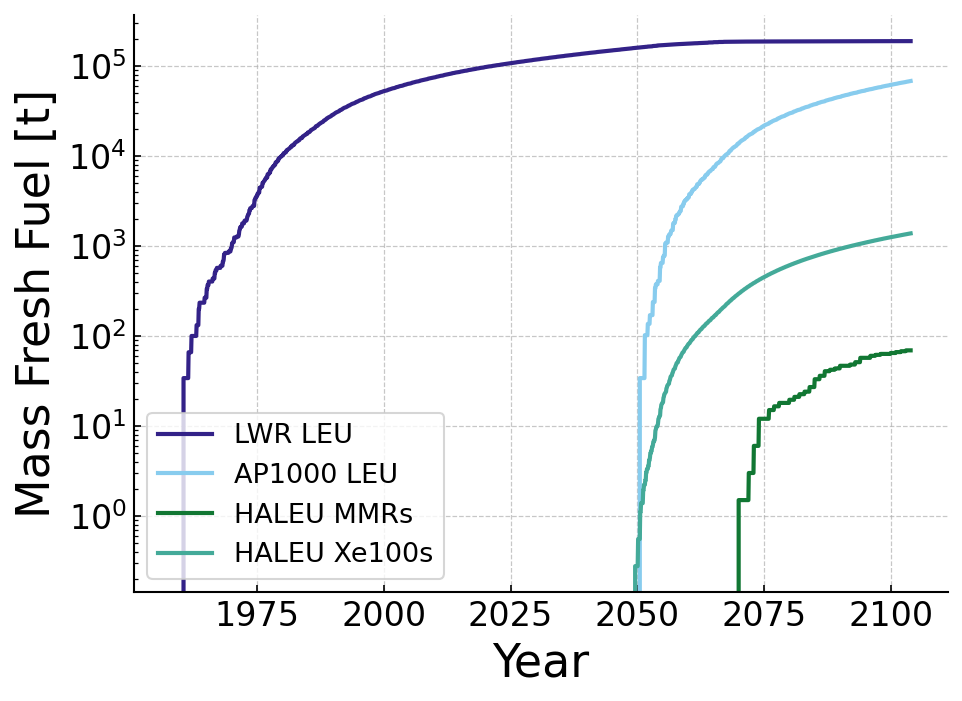

In [454]:
plt.plot(total_used['Year'], total_used['UOx'].cumsum()/1000, label='LWR LEU')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total AP UOx']/1000, label='AP1000 LEU', color=mycolors[3])
if 'AP1000' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total AP UOx']/1000, label='AP1000 LEU', color=mycolors[3])

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total MMRh']/1000, label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total MMRl']/1000, label='LEU+ MMRs')
if 'MMR' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total MMRh']/1000, label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total MMRh']/1000, label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total Xe100l']/1000, label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Total Xe100h']/1000, label='HALEU Xe100s')



plt.legend() #(loc=2)
plt.ylabel('Mass Fresh Fuel [t]')
plt.xlabel('Year')
plt.yscale('log')

plt.savefig(out_base + save + '_cumulative_by_fuel' + '.pdf')

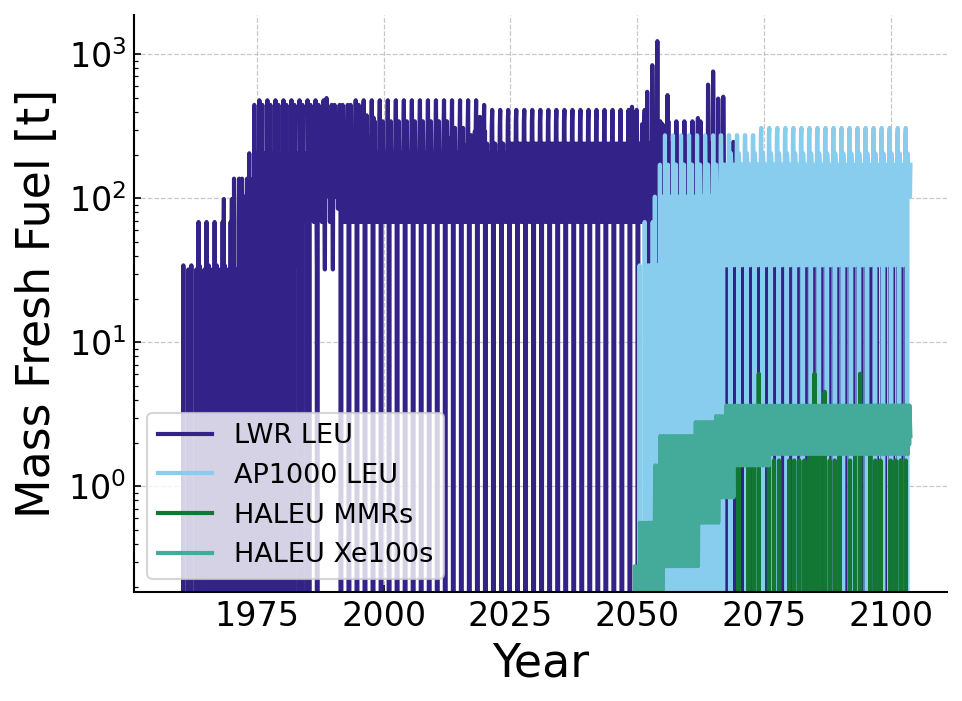

In [455]:
plt.plot(total_used['Year'], total_used['UOx']/1000, label='LWR LEU')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['AP UOx']/1000, label='AP1000s', color=mycolors[3])
if 'AP1000' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['AP UOx']/1000, label='AP1000 LEU', color=mycolors[3])

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['MMRh']/1000, label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['MMRl']/1000, label='LEU+ MMRs')
if 'MMR' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['MMRh']/1000, label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['MMRh']/1000, label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Xe100l']/1000, label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Xe100h']/1000, label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(total_used['Year'], total_used['Xe100h']/1000, label='HALEU Xe100s')



plt.legend() #(loc=2)
plt.ylabel('Mass Fresh Fuel [t]')
plt.xlabel('Year')
plt.yscale('log')

plt.savefig(out_base + save + '_by_fuel' + '.pdf')

In [ ]:
total_used = pd.DataFrame({'Year': current_reactors['Year'],'UOX': used_uox['Quantity'], 'Total UOX': used_uox['Quantity'].cumsum(), 'Xe100 HALEU': used_xe_haleu['Quantity'], 'Total Xe100 HALEU': used_xe_haleu['Quantity'].cumsum(), 'Xe100 LEU+': used_xe_leup['Quantity'], 'Total Xe100 LEU+': used_xe_leup['Quantity'].cumsum()})

In [ ]:
save = f'used/{file}_used_fuel'
total_used.to_csv(out_base + save + '.csv', index=False)

In [ ]:
total_used_mmr = pd.DataFrame({'Year': current_reactors['Year'],'UOX': used_uox['Quantity'], 'Total UOX': used_uox['Quantity'].cumsum(), 'MMR HALEU': used_mmr_haleu['Quantity'], 'Total MMR HALEU': used_mmr_haleu['Quantity'].cumsum()})

In [104]:
total_used_mmr = pd.DataFrame({'Year': current_reactors['Year'],'UOX': used_uox['Quantity'], 'Total UOX': used_uox['Quantity'].cumsum(), 'MMR HALEU': used_mmr_haleu['Quantity'], 'Total MMR HALEU': used_mmr_haleu['Quantity'].cumsum(), 'MMR LEU+': used_mmr_leup['Quantity'], 'Total MMR LEU+': used_mmr_leup['Quantity'].cumsum()})

In [105]:
save = f'used/{file}_used_fuel'
total_used_mmr.to_csv(out_base + save + '.csv', index=False)

In [ ]:
plt.plot(used_uox['Year'], used_uox['Quantity'].cumsum()/1000, label='Used LWR LEU')

# plt.plot(used_ap_uox['Year'], used_ap_uox['Quantity'].cumsum()/1000, label='Used AP UOx')

plt.plot(used_mmr_leup['Year'], used_mmr_leup['Quantity'].cumsum()/1000, label='Used MMR LEU+')
plt.plot(used_mmr_haleu['Year'], used_mmr_haleu['Quantity'].cumsum()/1000, label='Used MMR HALEU')

# plt.plot(used_xe_leup['Year'], used_xe_leup['Quantity'].cumsum()/1000, label='Used Xe100 LEU+')
# plt.plot(used_xe_haleu['Year'], used_xe_haleu['Quantity'].cumsum()/1000, label='Used Xe100 HALEU')

plt.yscale('log')
plt.ylabel('Total Used Fuel [t]')
plt.xlabel('Year')
plt.legend()

plt.savefig(out_base + save + '.pdf')

In [ ]:
plt.plot(used_uox['Year'], used_uox['Quantity']/1000, label='Used LWR LEU')

# plt.plot(used_ap_uox['Year'], used_ap_uox['Quantity']/1000, label='Used AP LWR LWU')

plt.plot(used_mmr_leup['Year'], used_mmr_leup['Quantity']/1000, label='Used MMR LEU+')
plt.plot(used_mmr_haleu['Year'], used_mmr_haleu['Quantity']/1000, label='Used MMR HALEU')

# plt.plot(used_xe_leup['Year'], used_xe_leup['Quantity']/1000, label='Used Xe100 LEU+')
# plt.plot(used_xe_haleu['Year'], used_xe_haleu['Quantity']/1000, label='Used Xe100 HALEU')

# plt.yscale('log')
plt.ylabel('Mass Used Fuel [t]')
plt.xlabel('Year')
plt.legend()

plt.savefig(out_base + save + '_yearly.pdf')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [456]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
mmrh_p = 0.1975
mmrl_p = 0.0995
xeh_p = 0.155
xel_p = 0.0995
x_f = 0.00711
x_t = 0.002

In [457]:
current_tails_lwr = dta.calculate_tails(current_uox['Quantity'], leu_p, x_t, x_f)
current_feed_lwr = dta.calculate_feed(current_uox['Quantity'], current_tails_lwr)
current_swu_lwr = dta.calculate_SWU(current_uox['Quantity'], leu_p,
                               current_tails_lwr, x_t,
                               current_feed_lwr, x_f)
current_swu_lwr = current_swu_lwr.to_frame().reset_index()
current_swu_lwr = current_swu_lwr.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_lwr = dta.add_year(current_swu_lwr)

In [458]:
current_tails_ap = dta.calculate_tails(current_ap_uox['Quantity'], leu_p, x_t, x_f)
current_feed_ap = dta.calculate_feed(current_ap_uox['Quantity'], current_tails_ap)
current_swu_ap = dta.calculate_SWU(current_ap_uox['Quantity'], leu_p,
                               current_tails_ap, x_t,
                               current_feed_ap, x_f)
current_swu_ap = current_swu_ap.to_frame().reset_index()
current_swu_ap = current_swu_ap.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_ap = dta.add_year(current_swu_ap)

In [227]:
total_swu_ap = pd.DataFrame({'Year': current_reactors['Year'],'UOx': current_swu_lwr['SWU'], 'Total LWR': current_swu_lwr['SWU'].cumsum(), 'AP UOx': current_swu_ap['SWU'], 'Total AP UOx': current_swu_ap['SWU'].cumsum()})

In [ ]:
total_swu_ap.plot(x='Year')
plt.yscale('log')

In [206]:
save = f'swu/{file}_swu'
total_swu_ap.to_csv(out_base + save + '.csv', index=False)

In [459]:
current_tails_mmrh = dta.calculate_tails(current_mmr_haleu['Quantity'], mmrh_p, x_t, x_f)
current_feed_mmrh = dta.calculate_feed(current_mmr_haleu['Quantity'], current_tails_mmrh)
current_swu_mmrh = dta.calculate_SWU(current_mmr_haleu['Quantity'], mmrh_p,
                               current_tails_mmrh, x_t,
                               current_feed_mmrh, x_f)
current_swu_mmrh = current_swu_mmrh.to_frame().reset_index()
current_swu_mmrh = current_swu_mmrh.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_mmrh = dta.add_year(current_swu_mmrh)

In [460]:
current_tails_mmrl = dta.calculate_tails(current_mmr_leup['Quantity'], mmrl_p, x_t, x_f)
current_feed_mmrl = dta.calculate_feed(current_mmr_leup['Quantity'], current_tails_mmrl)
current_swu_mmrl = dta.calculate_SWU(current_mmr_leup['Quantity'], mmrl_p,
                               current_tails_mmrl, x_t,
                               current_feed_mmrl, x_f)
current_swu_mmrl = current_swu_mmrl.to_frame().reset_index()
current_swu_mmrl = current_swu_mmrl.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_mmrl = dta.add_year(current_swu_mmrl)

In [461]:
current_tails_xeh = dta.calculate_tails(current_xe_haleu['Quantity'], xeh_p, x_t, x_f)
current_feed_xeh = dta.calculate_feed(current_xe_haleu['Quantity'], current_tails_xeh)
current_swu_xeh = dta.calculate_SWU(current_xe_haleu['Quantity'], xeh_p,
                               current_tails_xeh, x_t,
                               current_feed_xeh, x_f)
current_swu_xeh = current_swu_xeh.to_frame().reset_index()
current_swu_xeh = current_swu_xeh.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_xeh = dta.add_year(current_swu_xeh)

In [462]:
current_tails_xel = dta.calculate_tails(current_xe_leup['Quantity'], xel_p, x_t, x_f)
current_feed_xel = dta.calculate_feed(current_xe_leup['Quantity'], current_tails_xel)
current_swu_xel = dta.calculate_SWU(current_xe_leup['Quantity'], xel_p,
                               current_tails_xel, x_t,
                               current_feed_xel, x_f)
current_swu_xel = current_swu_xel.to_frame().reset_index()
current_swu_xel = current_swu_xel.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_xel = dta.add_year(current_swu_xel)

In [463]:
total_swu = pd.DataFrame({'Year': current_reactors['Year'],
'UOx SWU': current_swu_lwr['SWU'], 'Total UOx SWU': current_swu_lwr['SWU'].cumsum(),
'Xe100h SWU': current_swu_xeh['SWU'], 'Total Xe100h SWU': current_swu_xeh['SWU'].cumsum(),
'Xe100l SWU': current_swu_xel['SWU'], 'Total Xe100l SWU': current_swu_xel['SWU'].cumsum(),
'AP UOx SWU': current_swu_ap['SWU'], 'Total AP UOx SWU': current_swu_ap['SWU'].cumsum(),
'MMRh SWU': current_swu_mmrh['SWU'], 'Total MMRh SWU': current_swu_mmrh['SWU'].cumsum(),
'MMRl SWU': current_swu_mmrl['SWU'], 'Total MMRl SWU': current_swu_mmrl['SWU'].cumsum()})

save = f'swu/{file}_swu'
total_swu.to_csv(out_base + save + '.csv', index=False)

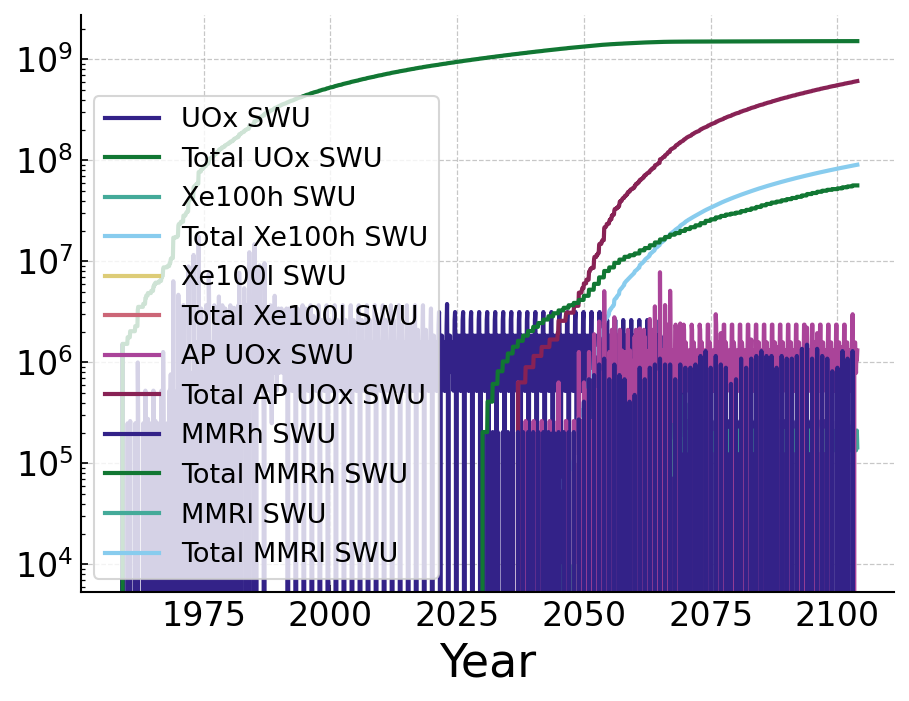

In [159]:
total_swu.plot(x='Year')
plt.yscale('log')

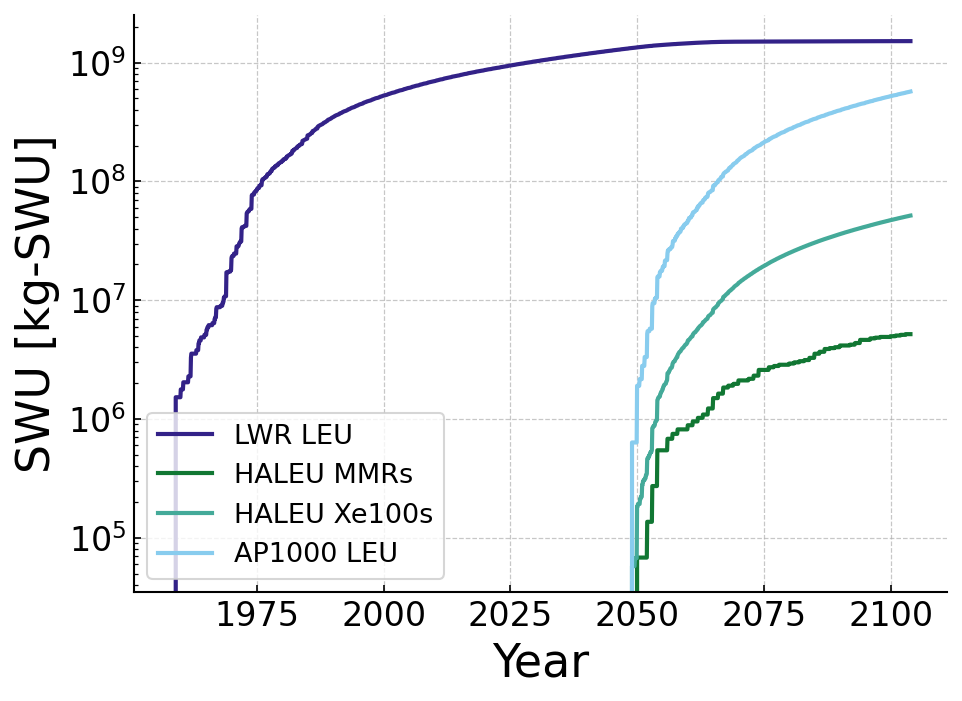

In [464]:
plt.plot(total_swu['Year'], total_swu['UOx SWU'].cumsum(), label='LWR LEU')

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total MMRh SWU'], label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total MMRl SWU'], label='LEU+ MMRs')
if 'MMR' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total MMRh SWU'], label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total MMRh SWU'], label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total Xe100h SWU'], label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total Xe100l SWU'], label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total Xe100h SWU'], label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total Xe100h SWU'], label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total Xe100h SWU'], label='HALEU Xe100s')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total AP UOx SWU'], label='AP1000 LEU')
if 'AP1000' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Total AP UOx SWU'], label='AP1000 LEU')

plt.legend() #(loc=2)
plt.ylabel('SWU [kg-SWU]')
plt.xlabel('Year')
plt.yscale('log')

plt.savefig(out_base + save + '_cumulative_by_fuel' + '.pdf')

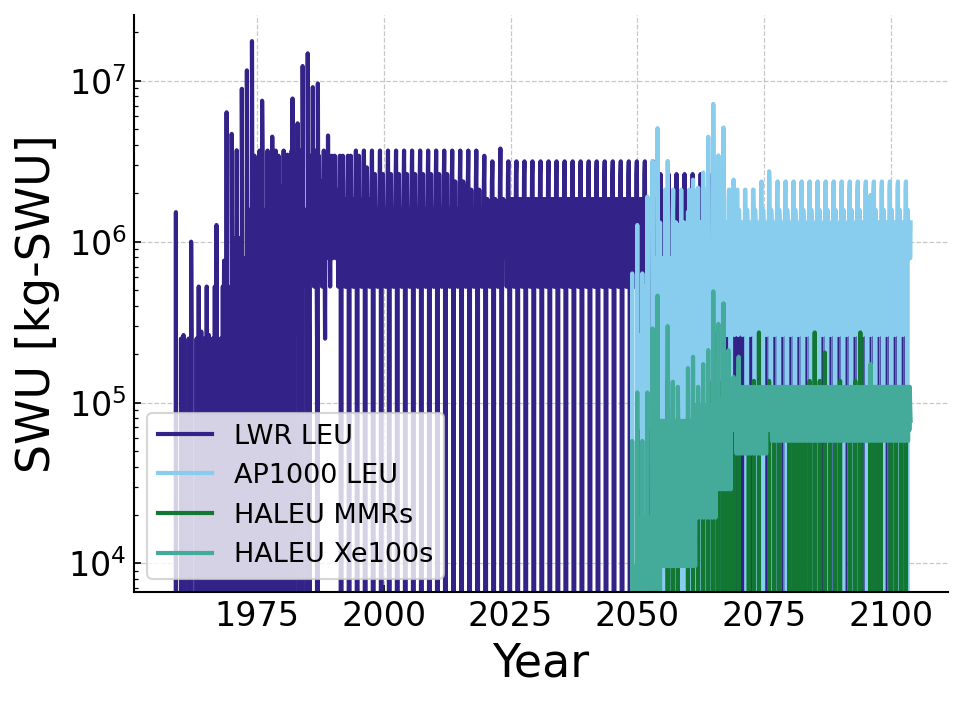

In [465]:
plt.plot(total_swu['Year'], total_swu['UOx SWU'], label='LWR LEU')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['AP UOx SWU'], label='AP1000 LEU', color=mycolors[3])
if 'AP1000' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['AP UOx SWU'], label='AP1000 LEU', color=mycolors[3])

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['MMRh SWU'], label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['MMRl SWU'], label='LEU+ MMRs')
if 'MMR' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['MMRh SWU'], label='HALEU MMRs')
if 'MMR_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['MMRh SWU'], label='HALEU MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Xe100h SWU'], label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Xe100l SWU'], label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Xe100h SWU'], label='HALEU Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Xe100h SWU'], label='HALEU Xe100s')
if 'Xe100h' in current_reactors.columns:
    plt.plot(total_swu['Year'], total_swu['Xe100h SWU'], label='HALEU Xe100s')



plt.legend() #(loc=2)
plt.ylabel('SWU [kg-SWU]')
plt.xlabel('Year')
plt.yscale('log')

plt.savefig(out_base + save + '_by_fuel' + '.pdf')

In [215]:
(6 + 9 + 10 + 12 + 14 + 2 + 4 + 6 + 8 + 10 + 11 + 14 + 2 + 4 + 7 + 8 + 10 + 13 + 16 + 23 + 14 + 27 + 25 + 9 + 4 + 6 + 6 + 19 + 13 + 18 + 21 + 14 + 6 + 6 + 13 + 10 + 18 + 20 + 20 + 36 + 18 + 38 + 36 + 18 + 5 + 12 + 15 + 29 + 22 + 21 + 31 + 27 + 13 + 6 + 15 + 19 + 26 + 21 + 23 + 41 + 19 + 49 + 41 + 27 + 8 + 18 + 29 + 35 + 31 + 34 + 41 + 31 + 24) * ad_reactors['MMR'][0]

6585

In [213]:
(2 + 2 + 2 + 3 + 6 + 9 + 2 + 6 + 3 + 3 + 1 + 2 + 4 + 3 + 3 + 6 + 9 + 7 + 7 + 3 + 4 + 3 + 1 + 1 + 2 + 1 + 1 + 2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 2 + 2 + 2 + 2 + 2 + 3 + 2 + 2 + 2 + 2 + 2 + 2 + 3 + 3) * ad_reactors['AP1000'][0]

159731

In [214]:
(11 + 11 + 11 + 11 + 11 + 12 + 12 + 12 + 12 + 12 + 12 + 12 + 12 + 13 + 13 + 13 + 13 + 13 + 13 + 9 + 8 + 12 + 13 + 4 + 5 + 9 + 1 + 7 + 6 + 1 + 12 + 10 + 13 + 12 + 3 + 10 + 12 + 3 + 2 + 4 + 3 + 4 + 3 + 4 + 4 + 4 + 4 + 4 + 4 + 5 + 5 + 5 + 5 + 6 + 6 + 6 + 6 + 6 + 7 + 18 + 15 + 16 + 15 + 16 + 17 + 18 + 18 + 18 + 19 + 19 + 19 + 19 + 20 + 21) * ad_reactors['Xe100'][0]

59520

In [ ]:
total_swu_xe = pd.DataFrame({'Year': current_reactors['Year'],'UOx': current_swu_lwr['SWU'], 'Total UOx SWU': current_swu_lwr['SWU'].cumsum(), 'Xe100 HALEU SWU': current_swu_xeh['SWU'], 'Total Xe100 HALEU SWU': current_swu_xeh['SWU'].cumsum(), 'Xe100 LEU+ SWU': current_swu_xel['SWU'], 'Total Xe100 LEU+ SWU': current_swu_xel['SWU'].cumsum()})

In [ ]:
total_swu_mmr = pd.DataFrame({'Year': current_reactors['Year'],'UOx': current_swu_lwr['SWU'], 'Total LWR': current_swu_lwr['SWU'].cumsum(), 'MMR HALEU': current_swu_mmrh['SWU'], 'Total MMR HALEU': current_swu_mmrh['SWU'].cumsum()})

In [112]:
total_swu_mmr = pd.DataFrame({'Year': current_reactors['Year'],'UOx': current_swu_lwr['SWU'], 'Total LWR': current_swu_lwr['SWU'].cumsum(), 'MMR HALEU': current_swu_mmrh['SWU'], 'Total MMR HALEU': current_swu_mmrh['SWU'].cumsum(), 'MMR LEU+': current_swu_mmrl['SWU'], 'Total MMR LEU+': current_swu_mmrl['SWU'].cumsum()})

In [113]:
save = f'swu/{file}_swu'
total_swu_mmr.to_csv(out_base + save + '.csv', index=False)

In [ ]:
total_swu = pd.DataFrame({'Year': current_reactors['Year'],'UOx': current_swu_lwr['SWU'], 'Total LWR': current_swu_lwr['SWU'].cumsum(), 'MMR HALEU': current_swu_mmrh['SWU'], 'Total MMR HALEU': current_swu_mmrh['SWU'].cumsum(), 'MMR LEU+': current_swu_mmrl['SWU'], 'Total MMR LEU+': current_swu_mmrl['SWU'].cumsum(), 'Xe100 HALEU': current_swu_xeh['SWU'], 'Total Xe100 HALEU': current_swu_xeh['SWU'].cumsum(), 'Xe100 LEU+': current_swu_xel['SWU'], 'Total Xe100 LEU+': current_swu_xel['SWU'].cumsum()})

In [ ]:
save = f'swu/{file}_swu'
total_swu.to_csv(out_base + save + '.csv', index=False)

In [ ]:
plt.plot(current_swu_lwr['Year'], current_swu_lwr['SWU'].cumsum(), label='UOx SWU')

# plt.plot(current_swu_ap['Year'], current_swu_ap['SWU'].cumsum(), label='AP UOx SWU')

plt.plot(current_swu_mmrh['Year'], current_swu_mmrh['SWU'].cumsum(), label='MMR HALEU SWU')
plt.plot(current_swu_mmrl['Year'], current_swu_mmrl['SWU'].cumsum(), label='MMR LEU+ SWU')

# plt.plot(current_swu_xeh['Year'], current_swu_xeh['SWU'].cumsum(), label='Xe100 HALEU SWU')
# plt.plot(current_swu_xel['Year'], current_swu_xel['SWU'].cumsum(), label='Xe100 LEU+ SWU')

# plt.ylim(10**6, 10**10)
plt.xlabel('Year')
plt.ylabel('SWU [kg-SWU]')
plt.yscale('log')
#title = plt.title('SWU Capacity to enrich uranium for LWRs', pad=20)
plt.legend()

plt.savefig(out_base + save + '.pdf')

In [ ]:
plt.plot(current_swu_lwr['Year'], current_swu_lwr['SWU'], label='UOx SWU')

# plt.plot(current_swu_ap['Year'], current_swu_ap['SWU'], label='AP UOx SWU')

plt.plot(current_swu_mmrh['Year'], current_swu_mmrh['SWU'], label='MMR HALEU SWU')
plt.plot(current_swu_mmrl['Year'], current_swu_mmrl['SWU'], label='MMR LEU+ SWU')

# plt.plot(current_swu_xeh['Year'], current_swu_xeh['SWU'], label='Xe100 HALEU SWU')
# plt.plot(current_swu_xel['Year'], current_swu_xel['SWU'], label='Xe100 LEU+ SWU')

# plt.ylim(10**6, 10**10)
plt.xlabel('Year')
plt.ylabel('SWU [kg-SWU]')
plt.yscale('log')
#title = plt.title('SWU Capacity to enrich uranium for LWRs', pad=20)
plt.legend()

plt.savefig(out_base + save + '_yearly.pdf')

# Isotopics

In [ ]:
all_isotopes = ['551370000', '922350000', '922380000', '942390000']
commodities_uox = ['used_uox']
commodities_mmrl = ['used_mmr_leup']
commodities_mmrh = ['used_mmr_haleu']
receivers = ['Sink_HLW']

In [ ]:
isotope_db_uox = nuclides.isotope_database(evaler=evaler,receivers=receivers, commodities=commodities_uox, isotopes=all_isotopes)

isotope_db_uox.to_csv('isotope_db_uox.csv')

In [ ]:
isotope_db_mmrl = nuclides.isotope_database(evaler=evaler,receivers=receivers, commodities=commodities_mmrl, isotopes=all_isotopes)

isotope_db_mmrl.to_csv('isotope_db_mmrl.csv')

In [ ]:
isotope_db_mmrh = nuclides.isotope_database(evaler=evaler,receivers=receivers, commodities=commodities_mmrh, isotopes=all_isotopes)

isotope_db_mmrh.to_csv('isotope_db_mmrh.csv')

In [ ]:
# read in the isotope database from the csv to a pandas dataframe
isotope_db_uox = pd.read_csv('isotope_db_uox.csv')

In [ ]:
isotope_db['TimeStep'] = isotope_db['Unnamed: 0']

In [ ]:
isotope_db = isotope_db.drop(columns=['Unnamed: 0'])
isotope_db = isotope_db.sort_values(by='TimeStep')

In [ ]:
isotope_db[['TimeStep','551370000_total','922350000_total','942390000_total']].plot(x='TimeStep', style=['-','-','-'])
plt.xlabel('Time [months]')
plt.ylabel('Total Mass [kg]')

legend = plt.legend()
legend.get_texts()[0].set_text(f'$^{{137}}$Cs')
legend.get_texts()[1].set_text(f'$^{{235}}$U')
legend.get_texts()[2].set_text(f'$^{{239}}$Pu')